<a href="https://colab.research.google.com/github/diegosan86/Proyecto_UAN_NoSQLArquitecturadeDatos-/blob/main/Reporte_hurto_modalidades_Policia_Nacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Proyecto** 
---

###### *Diego Alejandro Sánchez Bernal*

##**Análisis de casos de hurto por modalidades en Colombia**

## Entendimiento del negocio

**Contexto de negocio**. El hurto en colombia es un flagelo al cual están sometidos miles de personas, El Delito por Hurto, según el Art. 239 del Código Penal Colombiano, califica el delito de hurto al que se apodere de un objeto material, mueble ajeno, con el propósito de obtener provecho para sí o para otro, incurrirá en prisión de treinta y dos (32) a ciento ocho (108) meses. En la actualidad las modalidades de hurto en colombia son analizadas por la Camara de comercio de Bogota a traves del artefacto Encuesta de percepción y victimización de Bogotá y las secretarias de seguridad de las capitales y los municipios en el territorio colombiano, las denuncias de hurto por modalidades son captadas por las entidades Ponal y Fiscalia 

El reporte anual de seguridad de la Fiscalía General de la Nación, indicó que en el 2020 se recibieron más de 295.000 denuncias por hurto, lo que dejaría el promedio diario en 877 casos. Sin embargo, la cifra se redujo un 28 por ciento en comparación con el 2019 donde hubo 412.000 denuncias.

Según el reporte la módalidad de hurto de vehículos se recibieron 8.100 casos y de motos fueron 22.579.

El Ministerio de Defensa afirmó que el 2020 fue un año con tasas bajas en hurtos. Carlos Holmes Trujillo, jefe de la cartera resaltó la disminución en delitos como el hurto a residencias, con -31 por ciento; hurto a comercio, con un -33 por ciento; y la modalidad de hurto a personas, con un 34 por ciento.

Con base en lo anterior y la percepción de inseguridad de los habitantes del pais, se busca realizar un analisis del Aumento de delitos de hurto en Colombia a través de las modalidades de abigeato o robo de ganado, hurto a residencias, hurto a bancos, piratería o copia fraudulenta de productos sin consentimiento del titular, hurto a automotores, hurto a personas, hurto a motocicletas y hurto a entidades comerciales con el fín de identificar las zonas más vulneradas y el aumento de estas modalidades en los departamentos del país.

Está información fue consolidada a traves de las fuentes del portal web de: www.datosabiertos.gov.co y la pagina de www.policia.gov.co/grupo-informaci%C3%B3n-criminalidad/estadistica-delictiva usando la información disponible en el portal de Datos Abiertos de Colombia.

## Objetivo

El objetivo de este proyecto es el de recolectar, tratar, analizar y clasificar los datos referentes a las modalidades de hurto en colombia realizando un analisis exploratorio EDA e implementando técnicas de machine learning. 

## Adquisición y entendimiento de los datos

Para este caso se van a usar el consolidado de 3 conjuntos datos de reportes de hurtos por modalidad de la fuente Dijin de la Policia Nacional adquiridos a traves del portal de datos abiertos.

## Metricas

Para este caso se va analizar una problemática social desde un punto de
vista cuantitativo a partir de datos cualitativos no ordinales.

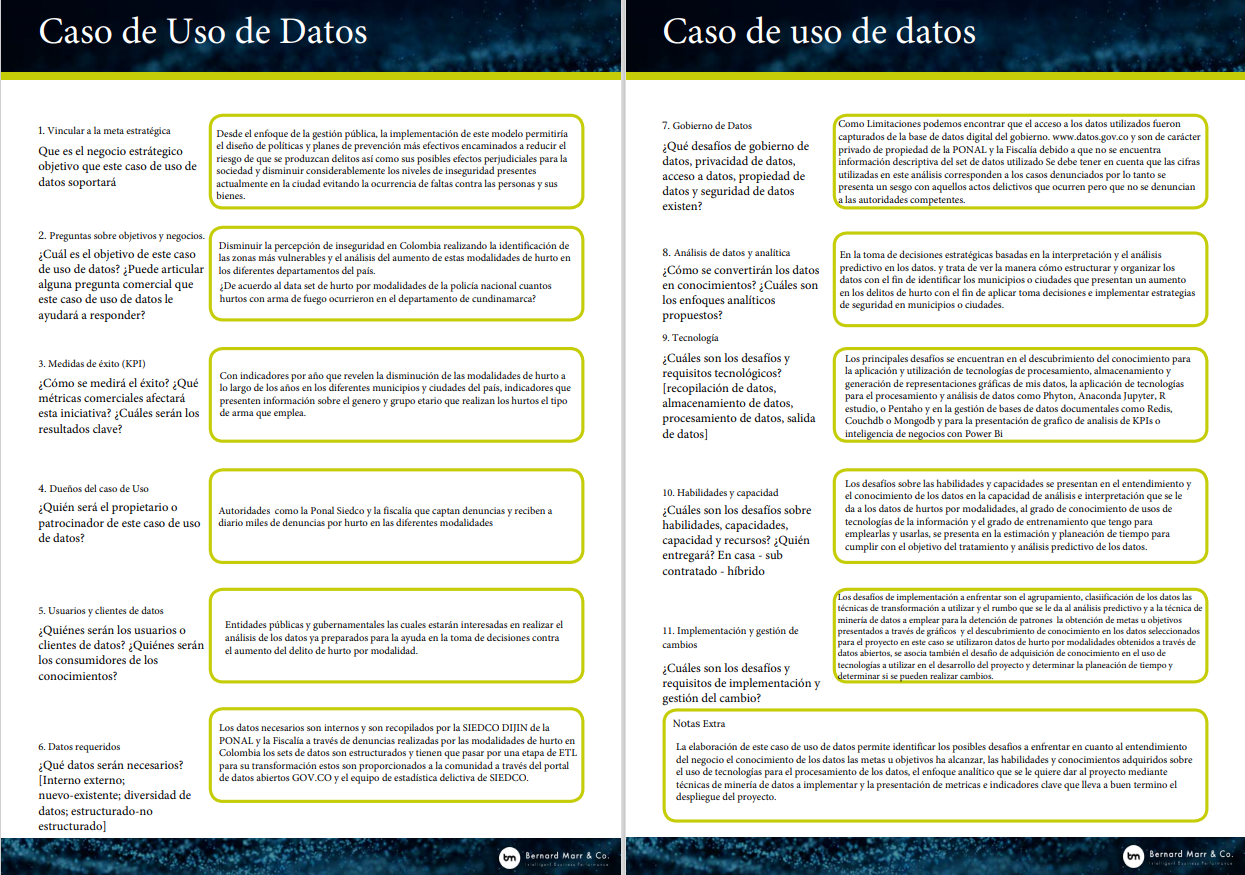

## Stakeholders

Entidades del orden público nacional, distrital y de la seguridad de los colombianos.


La población en general debido a la percepción de inseguridad en colombia.

### **DIAGRAMAS**

**Diagrama de flujo de datos lógico**

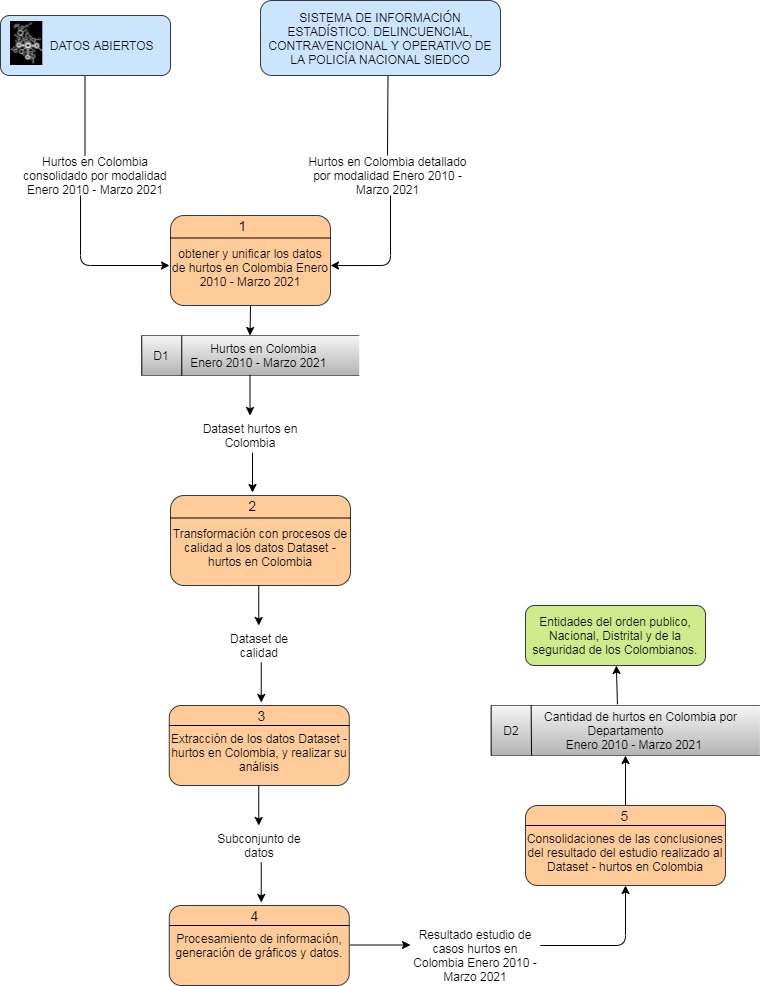

**Diagrama de flujo de datos Fisico**

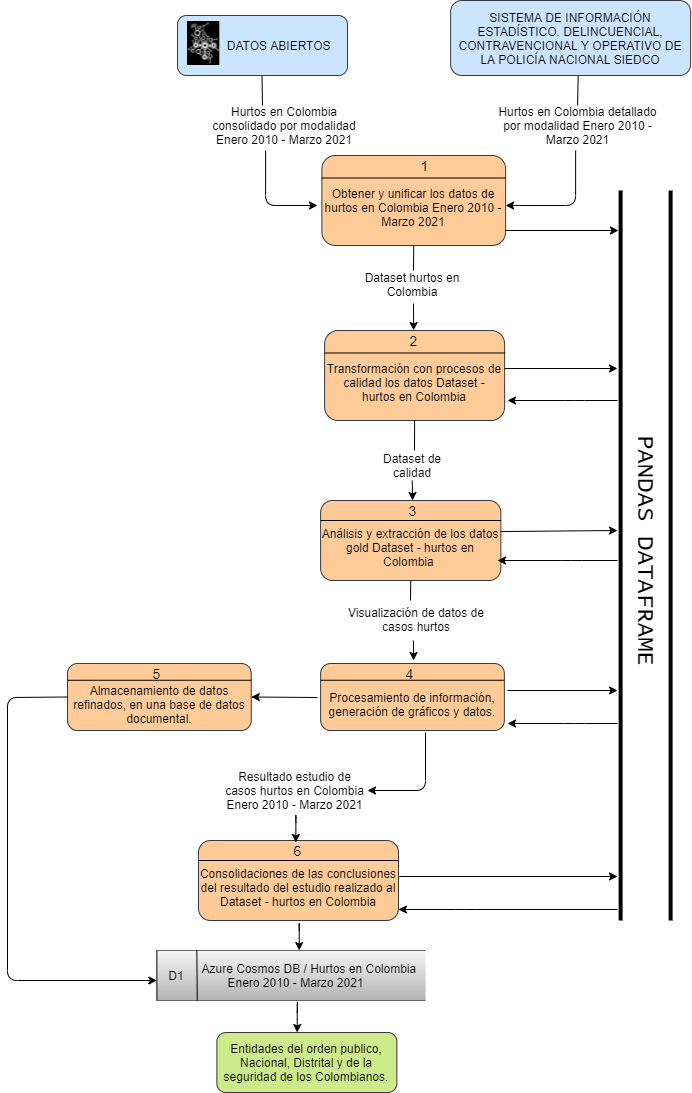

**Diagrama de Arquitectura Lógico**

**Diagrama de Arquitectura**

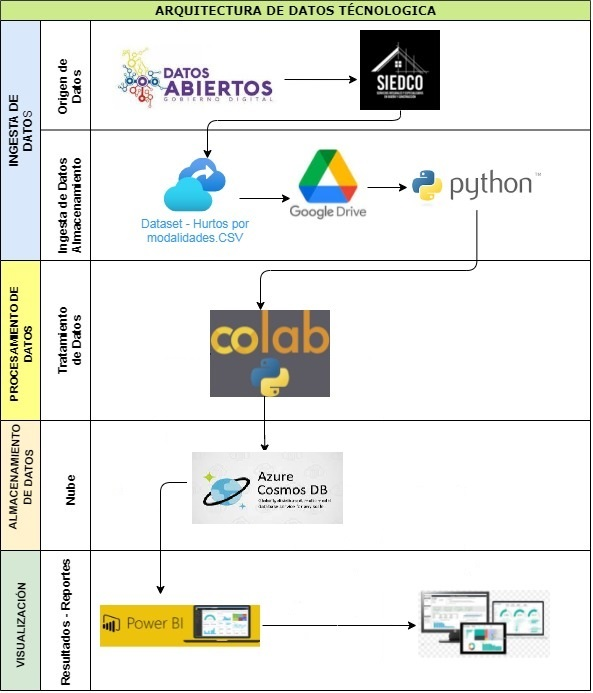

### Herramientas y paquetes para análisis de datos

Librerias utilizadas para el analisis de datos a traves de python. 

In [ ]:
!pip install tabulate

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import io
import pandas as pd
import numpy as np
import datetime as dt
import pylab as pl
import seaborn as sns; sns.set()
import graphviz
from numpy import NaN
from IPython.display import SVG
from tabulate import tabulate
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn import linear_model
from scipy.stats import uniform
from scipy.stats import randint


Importar la libreria de google para el cargue del archivo con el set de datos

In [ ]:
# ESCRIBA SU CODIGO AQUI
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Componentes graficos**

Tomados de internet con el fin de mejorar la visualización

**Función para graficar datos (X,y)**

In [ ]:
def plot_data(X,y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:,0], this_X[:, 1], c=color,
                   alpha=0.5, edgecolor='k',
                   label="Clase %s" % this_y)
        pl.legend(loc="best")
        #pl.title("Datos")

**Fúnción para visualizar la superficie de decisión de nuestro algoritmo**

In [ ]:
def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
      for j in range(grid_c):
        ZZ[i,j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 100, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y") 

**Funcion de Visualización**

In [ ]:
def conf_mx(cm,classes):
    cm.astype(int)
    row_0 =['','Valor','Predicho(Prediccion)']
    row_1 =['-',classes[0],cm[0,0],cm[0,1]]
    row_2 =[classes[0],cm[0,0],cm[0,1]]
    row_3 =[classes[1],cm[1,0],cm[1,1]]
    table = zip(row_0,row_1, row_2, row_3)
    headers = zip['', '', 'Valor', 'Verdadero (Etiqueta)']
    return print(tabulate(table, headers=headers, floatfmt=".0f"))

In [ ]:
def list_cm(cm,classes):
  if len(cm)==2:
    cm.astype(int)
    row_0 =['','Valor','Predicho(Prediccion)']
    row_1 =['-',classes[0],classes[1]]
    row_2 =[classes[0],cm[0,0],cm[0,1]]
    row_3 =[classes[1],cm[1,0],cm[1,1]]
    table = zip(row_0,row_1, row_2, row_3)
    headers = ['', '', 'Valor', 'Verdadero (Etiqueta)']
    return print(tabulate(table, headers=headers, floatfmt=".0f"))
  else:
    cm.astype(int)
    row_0 =['','Valor','Predicho','(Prediccion)']
    row_1 =['-',classes[0],classes[1],classes[2]]
    row_2 =[classes[0],cm[0,0],cm[0,1],cm[0,2]]
    row_3 =[classes[1],cm[1,0],cm[1,1],cm[1,2]]
    row_4 =[classes[2],cm[2,0],cm[2,1],cm[3,2]]
    table = zip(row_0,row_1, row_2, row_3, row_4)
    headers = ['', '', 'Valor', 'Verdadero', '(Etiqueta)']
    return print(tabulate(table, headers=headers, floatfmt=".0f"))

**Función de predicción**

In [ ]:
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

Importar los archivos en el dataframe.

In [ ]:
# ESCRIBA SU CODIGO AQUI 
df_Reporte_hurto_mod=pd.read_csv('/content/drive/MyDrive/Mineria de Datos/Data Set - Policia - Proyecto/Reporte_Hurto_por_Modalidades_Polic_a_Nacional_Final.csv',low_memory=False, encoding='utf-8')

In [ ]:
df_Reporte_hurto_mod[['DEPARTAMENTO', 'MUNICIPIO', 'GENERO', 'GRUPO ETARIO', 'TIPO DE HURTO']] = df_Reporte_hurto_mod[['DEPARTAMENTO', 'MUNICIPIO', 'GENERO', 'GRUPO ETARIO', 'TIPO DE HURTO']].astype(str)
df_Reporte_hurto_mod['FECHA HECHO'] = pd.to_datetime(df_Reporte_hurto_mod['FECHA HECHO'], errors='coerce')


#### Explorando los primeros 5 registros

In [ ]:
df_Reporte_hurto_mod.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,TIPO DE HURTO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,HURTO PERSONAS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,HURTO PERSONAS,1
2,BOYACÁ,TUNJA (CT),15001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,HURTO PERSONAS,1
3,CAQUETÁ,FLORENCIA (CT),18001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,HURTO PERSONAS,1
4,CHOCÓ,QUIBDÓ (CT),27001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,HURTO PERSONAS,2


#### Conociendo la estructura de los datos

In [ ]:
df_Reporte_hurto_mod.dtypes

DEPARTAMENTO     object
MUNICIPIO        object
CODIGO DANE      object
ARMAS MEDIOS     object
FECHA HECHO      object
GENERO           object
GRUPO ETARIO     object
TIPO DE HURTO    object
CANTIDAD          int64
dtype: object

#### Profundizando sobre la estructura y cantidad de datos

In [ ]:
df_Reporte_hurto_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638571 entries, 0 to 1638570
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   DEPARTAMENTO   1638571 non-null  object
 1   MUNICIPIO      1638571 non-null  object
 2   CODIGO DANE    1638571 non-null  object
 3   ARMAS MEDIOS   1638570 non-null  object
 4   FECHA HECHO    1638571 non-null  object
 5   GENERO         1638571 non-null  object
 6   GRUPO ETARIO   1636473 non-null  object
 7   TIPO DE HURTO  1638571 non-null  object
 8   CANTIDAD       1638571 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 112.5+ MB


#### Encontrando categorías en las variables

In [ ]:
df_Reporte_hurto_mod.nunique()

DEPARTAMENTO       34
MUNICIPIO        1024
CODIGO DANE      1251
ARMAS MEDIOS       21
FECHA HECHO      4108
GENERO              6
GRUPO ETARIO        7
TIPO DE HURTO       8
CANTIDAD          179
dtype: int64

**Haciendo un respaldo o copia de los datos originales**

In [ ]:
df2=df_Reporte_hurto_mod.copy()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638571 entries, 0 to 1638570
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   DEPARTAMENTO   1638571 non-null  object
 1   MUNICIPIO      1638571 non-null  object
 2   CODIGO DANE    1638571 non-null  object
 3   ARMAS MEDIOS   1638570 non-null  object
 4   FECHA HECHO    1638571 non-null  object
 5   GENERO         1638571 non-null  object
 6   GRUPO ETARIO   1636473 non-null  object
 7   TIPO DE HURTO  1638571 non-null  object
 8   CANTIDAD       1638571 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 112.5+ MB


### Transformando los datos

Ahora que ya se tienen los posibles valores de variables categóricas, es necesario hacer tareas de:



1.   **Selección**. Elección de variables que se usarán para el análisis.
2.   **Reemplazo**. Este reemplazo puede darse a nivel de:

> * Cambio de formato o tipo de datos  
> * Estandarización de posibles valores de una variable categórica (**replace**)
> * Tipos de datos


---

In [ ]:
#Revisando las columnas del dataframe original.
df2.columns

Index(['DEPARTAMENTO', 'MUNICIPIO', 'CODIGO DANE', 'ARMAS MEDIOS',
       'FECHA HECHO', 'GENERO', 'GRUPO ETARIO', 'TIPO DE HURTO', 'CANTIDAD'],
      dtype='object')

In [ ]:
#Ajustando los nombres de las columnas en el nuevo dataframe
df2=df2.rename(columns={'DEPARTAMENTO': 'departamento', 'MUNICIPIO': 'municipio', 'CODIGO DANE': 'codigo_dane', 'ARMAS MEDIOS': 'armas_medios', 'FECHA HECHO': 'fecha_hecho', 'GENERO' : 'genero', 'GRUPO ETARIO' : 'grupo_etario', 'TIPO DE HURTO' : 'tipo_de_hurto', 'CANTIDAD': 'cantidad_de_hurtos' }, errors="raise")
df2.columns

Index(['departamento', 'municipio', 'codigo_dane', 'armas_medios',
       'fecha_hecho', 'genero', 'grupo_etario', 'tipo_de_hurto',
       'cantidad_de_hurtos'],
      dtype='object')

In [ ]:
df2.head(2)

,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etario,tipo_de_hurto,cantidad_de_hurtos
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,HURTO PERSONAS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,HURTO PERSONAS,1


---

**Analisis y revisión de las columnas y ajuste en los valores**

In [ ]:
# Revisión Datos unicos iniciales de la columna departamento:
df2['departamento'].unique()

array(['ATLÁNTICO', 'BOYACÁ', 'CAQUETÁ', 'CHOCÓ', 'CÓRDOBA',
       'CUNDINAMARCA', 'HUILA', 'META', 'RISARALDA', 'SANTANDER', 'SUCRE',
       'TOLIMA', 'VALLE', 'ANTIOQUIA', 'CALDAS', 'BOLÍVAR', 'ARAUCA',
       'CAUCA', 'CESAR', 'NARIÑO', 'QUINDÍO', 'MAGDALENA',
       'NORTE DE SANTANDER', 'GUAJIRA', 'SAN ANDRÉS', 'VICHADA',
       'CASANARE', 'PUTUMAYO', 'GUAVIARE', 'AMAZONAS', 'GUAINÍA',
       'VAUPÉS', 'NO REPORTA', 'NO REPORTADO'], dtype=object)

In [ ]:
# Revisión de la columna departamento:
df2['departamento'].value_counts()

CUNDINAMARCA          317874
ANTIOQUIA             202753
VALLE                 172485
SANTANDER              97424
ATLÁNTICO              82484
TOLIMA                 64847
META                   58822
HUILA                  53785
CAUCA                  52397
BOLÍVAR                49394
NARIÑO                 46973
NORTE DE SANTANDER     43895
CESAR                  43572
RISARALDA              41442
BOYACÁ                 41031
MAGDALENA              36655
QUINDÍO                32042
CÓRDOBA                31471
SUCRE                  30749
CALDAS                 29821
GUAJIRA                25126
CASANARE               22556
CAQUETÁ                18611
CHOCÓ                  11645
ARAUCA                  9906
PUTUMAYO                7993
SAN ANDRÉS              5424
AMAZONAS                2682
GUAVIARE                1688
VICHADA                 1579
GUAINÍA                 1086
VAUPÉS                   357
NO REPORTADO               1
NO REPORTA                 1
Name: departam

In [ ]:
# Ajuste en los valores de 'NO REPORTADO' a 'NO REPORTA' de la columna departamento:
df2['departamento'].replace({'NO REPORTADO': 'NO REPORTA'}, inplace=True)

In [ ]:
# Verificación del ajuste realizado:
df2['departamento'].value_counts()

CUNDINAMARCA          317874
ANTIOQUIA             202753
VALLE                 172485
SANTANDER              97424
ATLÁNTICO              82484
TOLIMA                 64847
META                   58822
HUILA                  53785
CAUCA                  52397
BOLÍVAR                49394
NARIÑO                 46973
NORTE DE SANTANDER     43895
CESAR                  43572
RISARALDA              41442
BOYACÁ                 41031
MAGDALENA              36655
QUINDÍO                32042
CÓRDOBA                31471
SUCRE                  30749
CALDAS                 29821
GUAJIRA                25126
CASANARE               22556
CAQUETÁ                18611
CHOCÓ                  11645
ARAUCA                  9906
PUTUMAYO                7993
SAN ANDRÉS              5424
AMAZONAS                2682
GUAVIARE                1688
VICHADA                 1579
GUAINÍA                 1086
VAUPÉS                   357
NO REPORTA                 2
Name: departamento, dtype: int64

---

In [ ]:
# Revisión de la columna municipio
df2[df2.municipio.isin(df2.municipio.unique())].municipio.value_counts()

BOGOTÁ D.C. (CT)      221585
CALI (CT)              91190
MEDELLÍN (CT)          91174
BARRANQUILLA (CT)      51660
VILLAVICENCIO (CT)     39157
                       ...  
GUACAMAYAS                 4
PISBA                      4
JORDÁN                     3
NO REPORTA                 3
NO REPORTADO               1
Name: municipio, Length: 1024, dtype: int64

In [ ]:
# Ajuste en los valores de 'NO REPORTADO' y 'NO REPORTA' a 'NO_REPORTA'de la columna municipio:
df2['municipio'].replace({'NO REPORTADO': 'NO REPORTA'}, inplace=True)

In [ ]:
# Verificación de la columna municipio
df2[df2.municipio.isin(df2.municipio.unique())].municipio.value_counts()

BOGOTÁ D.C. (CT)      221585
CALI (CT)              91190
MEDELLÍN (CT)          91174
BARRANQUILLA (CT)      51660
VILLAVICENCIO (CT)     39157
                       ...  
GUACAMAYAS                 4
NO REPORTA                 4
LA SALINA                  4
PISBA                      4
JORDÁN                     3
Name: municipio, Length: 1023, dtype: int64

---

In [ ]:
# Revisión de la columna codigo_dane
df2.codigo_dane.value_counts()

11001000        221585
76001000         91190
5001000          66925
8001000          43863
50001000         39157
                 ...  
NO REPORTA           3
05873000             2
05543000             1
NO REPORTADO         1
05501000             1
Name: codigo_dane, Length: 1251, dtype: int64

---

In [ ]:
# Revisión Datos unicos iniciales columna armas_medios:
df2.armas_medios.unique()

array(['ARMA BLANCA / CORTOPUNZANTE', 'ARMA DE FUEGO', 'CONTUNDENTES',
       'CORTANTES', 'NO REPORTA', 'SIN EMPLEO DE ARMAS', 'LLAVE MAESTRA',
       'PERRO', 'CORTOPUNZANTES', 'ESCOPOLAMINA', 'PUNZANTES', 'JERINGA',
       'PALANCAS', 'SUSTANCIAS TOXICAS', 'VEHICULO', 'ALUCINOGENOS',
       'DIRECTA', 'NO REPORTADO', '-', nan,
       'ARTEFACTO EXPLOSIVO/CARGA DINAMITA', 'LLAMADA TELEFONICA'],
      dtype=object)

In [ ]:
# Revisión de la columna armas_medios:
df2['armas_medios'].value_counts()

SIN EMPLEO DE ARMAS                   665950
ARMA DE FUEGO                         311217
CONTUNDENTES                          260765
ARMA BLANCA / CORTOPUNZANTE           194607
LLAVE MAESTRA                         103404
PALANCAS                               42510
NO REPORTA                             21727
NO REPORTADO                           14432
ESCOPOLAMINA                           13836
CORTANTES                               9027
PUNZANTES                                433
PERRO                                    223
CORTOPUNZANTES                           191
-                                        150
JERINGA                                   87
SUSTANCIAS TOXICAS                         5
ARTEFACTO EXPLOSIVO/CARGA DINAMITA         2
ALUCINOGENOS                               1
DIRECTA                                    1
LLAMADA TELEFONICA                         1
VEHICULO                                   1
Name: armas_medios, dtype: int64

In [ ]:
df2[df2.armas_medios.isin(["DIRECTA", "LLAMADA TELEFONICA", "ARTEFACTO EXPLOSIVO/CARGA DINAMITA", "VEHICULO"])]

,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etario,tipo_de_hurto,cantidad_de_hurtos
435044,BOYACÁ,SOGAMOSO,15759000,VEHICULO,30/10/2017,FEMENINO,ADULTOS,HURTO PERSONAS,1
436968,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,DIRECTA,7/11/2017,FEMENINO,ADULTOS,HURTO PERSONAS,1
1453017,CUNDINAMARCA,GUATAVITA,25326000,ARTEFACTO EXPLOSIVO/CARGA DINAMITA,4/01/2016,NO REPORTA,NO REPORTA,HURTO ENTIDADES FINANCIERAS,1
1453709,CUNDINAMARCA,SIMIJACA,25745000,ARTEFACTO EXPLOSIVO/CARGA DINAMITA,15/01/2016,NO REPORTA,NO REPORTA,HURTO ENTIDADES FINANCIERAS,1
1506135,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,LLAMADA TELEFONICA,9/10/2017,FEMENINO,ADOLESCENTES,HURTO RESIDENCIAS,1


In [ ]:
# Ajuste en los valores de la columna armas_medios:
df2['armas_medios'].replace({'ARMA BLANCA / CORTOPUNZANTE': 'ARMA BLANCA', 'CORTANTES':'ARMA BLANCA', 'CORTOPUNZANTES':'ARMA BLANCA', 'PUNZANTES':'ARMA BLANCA', 'JERINGA':'ARMA BLANCA'}, inplace=True)
df2['armas_medios'].replace({'ARTEFACTO EXPLOSIVO/CARGA DINAMITA': 'EXPLOSIVO'}, inplace=True)
df2['armas_medios'].replace({'ESCOPOLAMINA' : 'SUSTANCIAS TOXICAS', 'ALUCINOGENOS':'SUSTANCIAS TOXICAS'}, inplace=True)
df2['armas_medios'].replace({'NO REPORTADO':'NO REPORTA', '-': 'NO REPORTA', 'DIRECTA': 'NO REPORTA', 'VEHICULO': 'NO REPORTA', 'LLAMADA TELEFONICA': 'NO REPORTA', 'PERRO': 'NO REPORTA'}, inplace=True)
df2['armas_medios'].replace({'PALANCAS': 'CONTUNDENTES'}, inplace=True)

In [ ]:
# Se reemplazan los valores faltantes o vacios de la columna armas_medios
df2['armas_medios'].replace({NaN:'NO REPORTA'}, inplace=True)

In [ ]:
# Verificación del ajuste realizado a los valores de la columna armas_medios.
df2['armas_medios'].unique()

array(['ARMA BLANCA', 'ARMA DE FUEGO', 'CONTUNDENTES', 'NO REPORTA',
       'SIN EMPLEO DE ARMAS', 'LLAVE MAESTRA', 'SUSTANCIAS TOXICAS',
       'EXPLOSIVO'], dtype=object)

In [ ]:
# Verificación del ajuste realizado a los valores de la columna armas_medios.
df2['armas_medios'].value_counts()

SIN EMPLEO DE ARMAS    665950
ARMA DE FUEGO          311217
CONTUNDENTES           303275
ARMA BLANCA            204345
LLAVE MAESTRA          103404
NO REPORTA              36536
SUSTANCIAS TOXICAS      13842
EXPLOSIVO                   2
Name: armas_medios, dtype: int64

---

In [ ]:
# Ajustar el tipo de los valores de la columna fecha_hecho:
df2.fecha_hecho = pd.to_datetime(df2.fecha_hecho)

In [ ]:
# validación del ajuste realizado al tipo de datos de la columna fecha_hecho:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638571 entries, 0 to 1638570
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   departamento        1638571 non-null  object        
 1   municipio           1638571 non-null  object        
 2   codigo_dane         1638571 non-null  object        
 3   armas_medios        1638571 non-null  object        
 4   fecha_hecho         1638571 non-null  datetime64[ns]
 5   genero              1638571 non-null  object        
 6   grupo_etario        1636473 non-null  object        
 7   tipo_de_hurto       1638571 non-null  object        
 8   cantidad_de_hurtos  1638571 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 112.5+ MB


In [ ]:
# Revisión Datos unicos iniciales columna fecha_hecho:
df2.fecha_hecho.unique()

array(['2010-01-01T00:00:00.000000000', '2010-02-01T00:00:00.000000000',
       '2010-03-01T00:00:00.000000000', ...,
       '2021-03-29T00:00:00.000000000', '2021-03-30T00:00:00.000000000',
       '2021-03-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
# Revisión de la columna fecha_hecho:
df2.fecha_hecho.value_counts()

2020-04-01    2071
2020-07-01    1928
2020-03-01    1876
2020-09-01    1738
2020-08-01    1725
              ... 
2010-06-20     117
2010-12-31     108
2010-12-26     104
2010-12-25     102
2013-12-31      89
Name: fecha_hecho, Length: 4108, dtype: int64

---

In [ ]:
# Revisión Datos unicos iniciales columna grupo_etario
df2['grupo_etario'].unique()

array(['ADULTOS', 'ADOLESCENTES', 'NO REPORTA', 'MENORES', 'NO APLICA',
       nan, 'ADOLECENTES', 'NO REPORTADO'], dtype=object)

In [ ]:
# Revisión de la columna grupo_etario:
df2['grupo_etario'].value_counts()

ADULTOS         1327723
NO REPORTADO     188858
NO APLICA         81490
ADOLESCENTES      30903
MENORES            3450
NO REPORTA         3424
ADOLECENTES         625
Name: grupo_etario, dtype: int64

In [ ]:
# Ajuste en los valores de la columna grupo_etario:
df2['grupo_etario'].replace({'NO REPORTADO' : 'NO REPORTA', 'NO APLICA': 'NO REPORTA'}, inplace=True)
df2['grupo_etario'].replace({'ADOLECENTES' : 'ADOLESCENTES'}, inplace=True)

In [ ]:
# Verificación del ajuste realizado a los valores de la columna grupo_etario
df2.grupo_etario.unique()

array(['ADULTOS', 'ADOLESCENTES', 'NO REPORTA', 'MENORES', nan],
      dtype=object)

In [ ]:
# Se reemplazan los valores faltantes o vacios de la columna armas_medios
df2['grupo_etario'].replace({NaN :'NO REPORTA'}, inplace=True)

In [ ]:
# Verificación del ajuste realizado a los valores de la columna grupo_etario
df2.grupo_etario.unique()

array(['ADULTOS', 'ADOLESCENTES', 'NO REPORTA', 'MENORES'], dtype=object)

In [ ]:
# Verificación del ajuste realizado a los valores de la columna grupo_etario
df2.grupo_etario.value_counts()

ADULTOS         1327723
NO REPORTA       275870
ADOLESCENTES      31528
MENORES            3450
Name: grupo_etario, dtype: int64

---

In [ ]:
# Revisión Datos unicos iniciales columna genero:
df2.genero.unique()

array(['MASCULINO', 'FEMENINO', 'NO REPORTA', 'NO APLICA', '-',
       'NO REPORTADO'], dtype=object)

In [ ]:
# Revisión de la columna genero:
df2.genero.value_counts()

MASCULINO       836331
FEMENINO        528093
NO REPORTADO    188912
NO APLICA        81490
NO REPORTA        3572
-                  173
Name: genero, dtype: int64

In [ ]:
# Ajuste en los valores de 'NO REPORTADO' y 'NO APLICA' a 'NO REPORTA' de la columna genero:
df2['genero'].replace({'NO REPORTADO' : 'NO REPORTA', 'NO APLICA': 'NO REPORTA', '-': 'NO REPORTA'}, inplace=True)

In [ ]:
# Verificación del ajuste realizado a los valores de la columna genero:
df2.genero.unique()

array(['MASCULINO', 'FEMENINO', 'NO REPORTA'], dtype=object)

In [ ]:
# Verificación del ajuste realizado a los valores de la columna genero:
df2.genero.value_counts()

MASCULINO     836331
FEMENINO      528093
NO REPORTA    274147
Name: genero, dtype: int64

---

In [ ]:
# Ajuste de valor de la columna tipo de hurto:
df2['tipo_de_hurto'].replace({'HURTO ABIGEATO' : 'HURTO A GANADO'}, inplace=True)

In [ ]:
# Revisión Datos unicos iniciales columna tipo_de_hurto
df2.tipo_de_hurto.unique()

array(['HURTO PERSONAS', 'HURTO AUTOMOTORES',
       'HURTO ENTIDADES COMERCIALES', 'HURTO MOTOCICLETAS',
       'HURTO RESIDENCIAS', 'HURTO A GANADO', 'HURTO PIRATERÍA TERRESTRE',
       'HURTO ENTIDADES FINANCIERAS'], dtype=object)

In [ ]:
# Revisión de la columna tipo_de_hurto
df2.tipo_de_hurto.value_counts()

HURTO PERSONAS                 844499
HURTO RESIDENCIAS              259736
HURTO ENTIDADES COMERCIALES    232063
HURTO MOTOCICLETAS             201691
HURTO AUTOMOTORES               66732
HURTO A GANADO                  28532
HURTO PIRATERÍA TERRESTRE        4029
HURTO ENTIDADES FINANCIERAS      1289
Name: tipo_de_hurto, dtype: int64

---

In [ ]:
# Revisión Datos unicos iniciales columna cantidad_de_hurtos
df2.cantidad_de_hurtos.unique()

array([  1,   2,   3,   5,   4,   6,  10,   9,   8,  15,   7,  12,  14,
        11,  16,  18,  13,  17,  21,  19,  29,  20,  26,  24,  23,  22,
        25,  31,  28,  34,  27,  30,  32,  43,  33,  42,  36,  44,  35,
        37,  45,  40,  39,  46,  38,  41,  48,  56,  50,  49,  84,  82,
        47,  57,  69,  72,  59,  92,  55,  54,  75,  81,  58,  60,  51,
        68,  65,  76,  73,  66,  52,  85,  53,  62,  79,  94,  78,  67,
        80,  77,  64,  74,  63,  61,  70,  87,  86,  71,  95,  89,  88,
        83,  90,  96,  91,  97, 106,  93, 105, 107, 115, 113, 103, 100,
       101, 104, 117, 114, 108, 102,  99, 109, 112, 141, 110,  98, 120,
       111, 128, 137, 121, 133, 123, 127, 116, 129, 125, 119, 124, 147,
       135, 140, 126, 136, 134, 118, 122, 139, 132, 144, 152, 131, 163,
       146, 138, 171, 145, 150, 130, 143, 160, 148, 156, 149, 162, 142,
       153, 157, 151, 175, 159, 183, 196, 154, 180, 169, 202, 205, 158,
       204, 155, 178, 177, 161, 173, 168, 203, 207, 194])

In [ ]:
# Revisión de la columna cantidad_de_hurtos:
df2.cantidad_de_hurtos.value_counts()

1      1328399
2       157048
3        56173
4        28124
5        16856
        ...   
173          1
168          1
205          1
155          1
207          1
Name: cantidad_de_hurtos, Length: 179, dtype: int64

---

###Detección de datos faltantes o missing values.
**Verificar cuales valores son NaN o nulos (Null)**


In [ ]:
df2.isna()

,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etario,tipo_de_hurto,cantidad_de_hurtos
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1638566,False,False,False,False,False,False,False,False,False
1638567,False,False,False,False,False,False,False,False,False
1638568,False,False,False,False,False,False,False,False,False
1638569,False,False,False,False,False,False,False,False,False


 **verificar cuales valores son na**

In [ ]:
df2.isnull()

,departamento,municipio,codigo_dane,armas_medios,fecha_hecho,genero,grupo_etario,tipo_de_hurto,cantidad_de_hurtos
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1638566,False,False,False,False,False,False,False,False,False
1638567,False,False,False,False,False,False,False,False,False
1638568,False,False,False,False,False,False,False,False,False
1638569,False,False,False,False,False,False,False,False,False


**Verificar si hay datos faltantes por columna**

In [ ]:
df2.isnull().any()

departamento          False
municipio             False
codigo_dane           False
armas_medios          False
fecha_hecho           False
genero                False
grupo_etario          False
tipo_de_hurto         False
cantidad_de_hurtos    False
dtype: bool

**Numero de datos faltantes**

Calcular el numero de datos nulos que hay por columna

Numero de datos faltantes por columna

In [ ]:
df2.isnull().sum()

departamento          0
municipio             0
codigo_dane           0
armas_medios          0
fecha_hecho           0
genero                0
grupo_etario          0
tipo_de_hurto         0
cantidad_de_hurtos    0
dtype: int64

In [ ]:
df2.duplicated().value_counts()

False    1420655
True      217916
dtype: int64

**Contar cuantos datos duplicados existen**

In [ ]:
df2.duplicated().sum()

217916

---

###Analisis de los datos data cleansing, balanceo y Transformación

**Campo tipo de hurto**

In [ ]:
df2_selected_data.tipo_de_hurto.value_counts()

HURTO PERSONAS                 844499
HURTO RESIDENCIAS              259736
HURTO ENTIDADES COMERCIALES    232063
HURTO MOTOCICLETAS             201691
HURTO AUTOMOTORES               66732
HURTO A GANADO                  28532
HURTO PIRATERÍA TERRESTRE        4029
HURTO ENTIDADES FINANCIERAS      1289
Name: tipo_de_hurto, dtype: int64

In [ ]:
#campo tipo_de_hurto
df2_selected_data.tipo_de_hurto.value_counts()<=140000

HURTO PERSONAS                 False
HURTO RESIDENCIAS              False
HURTO ENTIDADES COMERCIALES    False
HURTO MOTOCICLETAS             False
HURTO AUTOMOTORES               True
HURTO A GANADO                  True
HURTO PIRATERÍA TERRESTRE       True
HURTO ENTIDADES FINANCIERAS     True
Name: tipo_de_hurto, dtype: bool

In [ ]:
s_tipo_de_hurto=df2_selected_data.tipo_de_hurto.value_counts()<=140000

In [ ]:
s_tipo_de_hurto

HURTO PERSONAS                 False
HURTO RESIDENCIAS              False
HURTO ENTIDADES COMERCIALES    False
HURTO MOTOCICLETAS             False
HURTO AUTOMOTORES               True
HURTO A GANADO                  True
HURTO PIRATERÍA TERRESTRE       True
HURTO ENTIDADES FINANCIERAS     True
Name: tipo_de_hurto, dtype: bool

In [ ]:
s_tipo_de_hurto[s_tipo_de_hurto==True].index

Index(['HURTO AUTOMOTORES', 'HURTO A GANADO', 'HURTO PIRATERÍA TERRESTRE',
       'HURTO ENTIDADES FINANCIERAS'],
      dtype='object')

In [ ]:
df2_selected_data[~df2_selected_data.tipo_de_hurto.isin(s_tipo_de_hurto[s_tipo_de_hurto==True].index)].tipo_de_hurto.value_counts()

HURTO PERSONAS                 844499
HURTO RESIDENCIAS              259736
HURTO ENTIDADES COMERCIALES    232063
HURTO MOTOCICLETAS             201691
Name: tipo_de_hurto, dtype: int64

In [ ]:
df2_selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638571 entries, 0 to 1638570
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   departamento        1638571 non-null  object        
 1   municipio           1638571 non-null  object        
 2   armas_medios        1638571 non-null  object        
 3   fecha_hecho         1638571 non-null  datetime64[ns]
 4   genero              1638571 non-null  object        
 5   grupo_etario        1638571 non-null  object        
 6   tipo_de_hurto       1638571 non-null  object        
 7   cantidad_de_hurtos  1638571 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 100.0+ MB


In [ ]:
df2_selected_data_new=df2_selected_data[~df2_selected_data.tipo_de_hurto.isin(s_tipo_de_hurto[s_tipo_de_hurto==True].index)].copy()

In [ ]:
# df2_selected_data_new=df2_selected_data.copy()

In [ ]:
df2_selected_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1537989 entries, 0 to 1638570
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   departamento        1537989 non-null  object        
 1   municipio           1537989 non-null  object        
 2   armas_medios        1537989 non-null  object        
 3   fecha_hecho         1537989 non-null  datetime64[ns]
 4   genero              1537989 non-null  object        
 5   grupo_etario        1537989 non-null  object        
 6   tipo_de_hurto       1537989 non-null  object        
 7   cantidad_de_hurtos  1537989 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 105.6+ MB


In [ ]:
df2_selected_data_new.tipo_de_hurto.value_counts()

HURTO PERSONAS                 844499
HURTO RESIDENCIAS              259736
HURTO ENTIDADES COMERCIALES    232063
HURTO MOTOCICLETAS             201691
Name: tipo_de_hurto, dtype: int64

---

**Campo armas_medios**

In [ ]:
df2_selected_data_new.armas_medios.value_counts()

SIN EMPLEO DE ARMAS    635178
CONTUNDENTES           301321
ARMA DE FUEGO          284416
ARMA BLANCA            197937
LLAVE MAESTRA           77399
NO REPORTA              29276
SUSTANCIAS TOXICAS      12462
Name: armas_medios, dtype: int64

In [ ]:
df2_selected_data_new.armas_medios.value_counts()<=100000

SIN EMPLEO DE ARMAS    False
CONTUNDENTES           False
ARMA DE FUEGO          False
ARMA BLANCA            False
LLAVE MAESTRA           True
NO REPORTA              True
SUSTANCIAS TOXICAS      True
Name: armas_medios, dtype: bool

In [ ]:
s_armas_medios=df2_selected_data_new.armas_medios.value_counts()<=100000

In [ ]:
s_armas_medios[s_armas_medios==True].index

Index(['LLAVE MAESTRA', 'NO REPORTA', 'SUSTANCIAS TOXICAS'], dtype='object')

In [ ]:
df2_selected_data_new[~df2_selected_data_new.armas_medios.isin(s_armas_medios[s_armas_medios==True].index)].armas_medios.value_counts()

SIN EMPLEO DE ARMAS    635178
CONTUNDENTES           301321
ARMA DE FUEGO          284416
ARMA BLANCA            197937
Name: armas_medios, dtype: int64

In [ ]:
df2_selected_data_new=df2_selected_data_new[~df2_selected_data_new.armas_medios.isin(s_armas_medios[s_armas_medios==True].index)].copy()

In [ ]:
df2_selected_data_new.armas_medios.value_counts()

SIN EMPLEO DE ARMAS    635178
CONTUNDENTES           301321
ARMA DE FUEGO          284416
ARMA BLANCA            197937
Name: armas_medios, dtype: int64

In [ ]:
df2_selected_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418852 entries, 0 to 1638570
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   departamento        1418852 non-null  object        
 1   municipio           1418852 non-null  object        
 2   armas_medios        1418852 non-null  object        
 3   fecha_hecho         1418852 non-null  datetime64[ns]
 4   genero              1418852 non-null  object        
 5   grupo_etario        1418852 non-null  object        
 6   tipo_de_hurto       1418852 non-null  object        
 7   cantidad_de_hurtos  1418852 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 97.4+ MB


---

**Campo departamento**

In [ ]:
df2_selected_data_new.departamento.value_counts()

CUNDINAMARCA          276460
ANTIOQUIA             164313
VALLE                 144970
SANTANDER              90392
ATLÁNTICO              72655
TOLIMA                 56820
META                   50616
HUILA                  46888
BOLÍVAR                44520
CAUCA                  42939
NARIÑO                 38910
NORTE DE SANTANDER     37919
BOYACÁ                 37763
RISARALDA              37602
CESAR                  36431
MAGDALENA              32864
QUINDÍO                30220
CÓRDOBA                28065
SUCRE                  27501
CALDAS                 27500
GUAJIRA                20826
CASANARE               18697
CAQUETÁ                16843
CHOCÓ                  10180
ARAUCA                  8191
PUTUMAYO                7065
SAN ANDRÉS              4913
AMAZONAS                2563
GUAVIARE                1499
VICHADA                 1388
GUAINÍA                 1027
VAUPÉS                   310
NO REPORTA                 2
Name: departamento, dtype: int64

In [ ]:
s_departamento=df2_selected_data_new.departamento.value_counts()<=40000

In [ ]:
s_departamento[s_departamento==True].index

Index(['NARIÑO', 'NORTE DE SANTANDER', 'BOYACÁ', 'RISARALDA', 'CESAR',
       'MAGDALENA', 'QUINDÍO', 'CÓRDOBA', 'SUCRE', 'CALDAS', 'GUAJIRA',
       'CASANARE', 'CAQUETÁ', 'CHOCÓ', 'ARAUCA', 'PUTUMAYO', 'SAN ANDRÉS',
       'AMAZONAS', 'GUAVIARE', 'VICHADA', 'GUAINÍA', 'VAUPÉS', 'NO REPORTA'],
      dtype='object')

In [ ]:
df2_selected_data_new=df2_selected_data_new[~df2_selected_data_new.departamento.isin(s_departamento[s_departamento==True].index)].copy()

In [ ]:
df2_selected_data_new.departamento.value_counts()

CUNDINAMARCA          276460
ANTIOQUIA             164313
VALLE                 144970
SANTANDER              90392
ATLÁNTICO              72655
TOLIMA                 56820
META                   50616
HUILA                  46888
BOLÍVAR                44520
CAUCA                  42939
NARIÑO                 38910
NORTE DE SANTANDER     37919
BOYACÁ                 37763
RISARALDA              37602
CESAR                  36431
MAGDALENA              32864
QUINDÍO                30220
CÓRDOBA                28065
SUCRE                  27501
CALDAS                 27500
GUAJIRA                20826
CASANARE               18697
CAQUETÁ                16843
CHOCÓ                  10180
ARAUCA                  8191
PUTUMAYO                7065
SAN ANDRÉS              4913
AMAZONAS                2563
GUAVIARE                1499
VICHADA                 1388
GUAINÍA                 1027
VAUPÉS                   310
NO REPORTA                 2
Name: departamento, dtype: int64

In [ ]:
df2_selected_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418852 entries, 0 to 1638570
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   departamento        1418852 non-null  object        
 1   municipio           1418852 non-null  object        
 2   armas_medios        1418852 non-null  object        
 3   fecha_hecho         1418852 non-null  datetime64[ns]
 4   genero              1418852 non-null  object        
 5   grupo_etario        1418852 non-null  object        
 6   tipo_de_hurto       1418852 non-null  object        
 7   cantidad_de_hurtos  1418852 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 97.4+ MB


---

**Campo municipio**

In [ ]:
df2_selected_data_new.municipio.value_counts()

BOGOTÁ D.C. (CT)      191486
CALI (CT)              73441
MEDELLÍN (CT)          71608
BARRANQUILLA (CT)      45285
VILLAVICENCIO (CT)     34794
                       ...  
LA SALINA                  4
SAN EDUARDO                3
PISBA                      3
JORDÁN                     3
GUACAMAYAS                 2
Name: municipio, Length: 1023, dtype: int64

In [ ]:
s_municipio=df2_selected_data_new.municipio.value_counts()<=30000

In [ ]:
s_municipio[s_municipio==True].index

Index(['CARTAGENA (CT)', 'IBAGUÉ (CT)', 'NEIVA (CT)', 'CÚCUTA (CT)',
       'PASTO (CT)', 'PEREIRA (CT)', 'POPAYÁN (CT)', 'SANTA MARTA (CT)',
       'VALLEDUPAR (CT)', 'SOACHA',
       ...
       'COVARACHÍA', 'CARCASÍ', 'BUSBANZÁ', 'NO REPORTA', 'ROBERTO PAYÁN',
       'LA SALINA', 'SAN EDUARDO', 'PISBA', 'JORDÁN', 'GUACAMAYAS'],
      dtype='object', length=1017)

In [ ]:
df2_selected_data_new=df2_selected_data_new[~df2_selected_data_new.municipio.isin(s_municipio[s_municipio==True].index)].copy()

In [ ]:
df2_selected_data_new.municipio.value_counts()

BOGOTÁ D.C. (CT)      191486
CALI (CT)              73441
MEDELLÍN (CT)          71608
BARRANQUILLA (CT)      45285
VILLAVICENCIO (CT)     34794
BUCARAMANGA (CT)       33447
Name: municipio, dtype: int64

In [ ]:
df2_selected_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450061 entries, 0 to 1638569
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   departamento        450061 non-null  object        
 1   municipio           450061 non-null  object        
 2   armas_medios        450061 non-null  object        
 3   fecha_hecho         450061 non-null  datetime64[ns]
 4   genero              450061 non-null  object        
 5   grupo_etario        450061 non-null  object        
 6   tipo_de_hurto       450061 non-null  object        
 7   cantidad_de_hurtos  450061 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 30.9+ MB


**Campo fecha_hecho**

---

In [ ]:
df2_selected_data_new.fecha_hecho.value_counts()

2020-07-01    1131
2020-08-01    1019
2020-09-01    1012
2020-04-01     954
2020-03-01     946
              ... 
2016-09-05      32
2013-12-31      32
2016-03-24      31
2012-12-25      30
2010-06-20      28
Name: fecha_hecho, Length: 4108, dtype: int64

In [ ]:
s_fecha_hecho=df2_selected_data_new.fecha_hecho.value_counts()<=200

In [ ]:
s_fecha_hecho[s_fecha_hecho==True].index

DatetimeIndex(['2020-12-27', '2020-06-22', '2021-10-01', '2020-02-04',
               '2020-04-22', '2020-10-05', '2020-03-05', '2020-04-14',
               '2021-01-01', '2020-06-04',
               ...
               '2015-03-04', '2010-06-27', '2010-02-04', '2016-03-25',
               '2016-07-20', '2016-09-05', '2013-12-31', '2016-03-24',
               '2012-12-25', '2010-06-20'],
              dtype='datetime64[ns]', length=3688, freq=None)

In [ ]:
df2_selected_data_new=df2_selected_data_new[~df2_selected_data_new.fecha_hecho.isin(s_fecha_hecho[s_fecha_hecho==True].index)].copy()

In [ ]:
df2_selected_data_new.fecha_hecho.value_counts()

2020-07-01    1131
2020-08-01    1019
2020-09-01    1012
2020-04-01     954
2020-03-01     946
              ... 
2020-05-31     212
2020-07-06     211
2020-04-13     205
2021-11-01     204
2020-04-20     202
Name: fecha_hecho, Length: 420, dtype: int64

In [ ]:
df2_selected_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200047 entries, 642002 to 1638569
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   departamento        200047 non-null  object        
 1   municipio           200047 non-null  object        
 2   armas_medios        200047 non-null  object        
 3   fecha_hecho         200047 non-null  datetime64[ns]
 4   genero              200047 non-null  object        
 5   grupo_etario        200047 non-null  object        
 6   tipo_de_hurto       200047 non-null  object        
 7   cantidad_de_hurtos  200047 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 13.7+ MB


---

**Campo grupo_etario**

In [ ]:
#df2_selected_data_new.grupo_etario.value_counts()

In [ ]:
#df2_selected_data_new['grupo_etario'].replace({NaN :'NO REPORTA'}, inplace=True)

In [ ]:
#s_grupo_etario=df2_selected_data_new.grupo_etario.value_counts()<=30000

In [ ]:
#s_grupo_etario[s_grupo_etario==True].index

In [ ]:
#df2_selected_data_new=df2_selected_data_new[~df2_selected_data_new.grupo_etario.isin(s_grupo_etario[s_grupo_etario==True].index)].copy()

---

**Campo cantidad_de_hurtos**

In [ ]:
#df2_selected_data_new.cantidad_de_hurtos.value_counts()

In [ ]:
#s_cantidad_de_hurtos=df2_selected_data_new.cantidad_de_hurtos.value_counts()<=30000

In [ ]:
#s_cantidad_de_hurtos[s_cantidad_de_hurtos==True].index

In [ ]:
#df2_selected_data_new=df2_selected_data_new[~df2_selected_data_new.cantidad_de_hurtos.isin(s_cantidad_de_hurtos[s_cantidad_de_hurtos==True].index)].copy()

In [ ]:
df2_selected_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200047 entries, 642002 to 1638569
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   departamento        200047 non-null  object        
 1   municipio           200047 non-null  object        
 2   armas_medios        200047 non-null  object        
 3   fecha_hecho         200047 non-null  datetime64[ns]
 4   genero              200047 non-null  object        
 5   grupo_etario        200047 non-null  object        
 6   tipo_de_hurto       200047 non-null  object        
 7   cantidad_de_hurtos  200047 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 13.7+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638571 entries, 0 to 1638570
Data columns (total 9 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   departamento        1638571 non-null  object        
 1   municipio           1638571 non-null  object        
 2   codigo_dane         1638571 non-null  object        
 3   armas_medios        1638571 non-null  object        
 4   fecha_hecho         1638571 non-null  datetime64[ns]
 5   genero              1638571 non-null  object        
 6   grupo_etario        1638571 non-null  object        
 7   tipo_de_hurto       1638571 non-null  object        
 8   cantidad_de_hurtos  1638571 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 112.5+ MB


---

### Transformación de los datos.

**Iniciamos a cambiar nuestras variables**

In [ ]:
df2_selected_data_new.genero.value_counts()

MASCULINO     102791
FEMENINO       68395
NO REPORTA     28861
Name: genero, dtype: int64

In [ ]:
df3_selected_data_new=df2_selected_data_new.copy()

In [ ]:
def crear_genero(genero):
    if genero == "FEMENINO":
        return 1
    elif genero == "MASCULINO" :
        return -1
    else:
      return 0

**Cambiamos variable genero**

In [ ]:
df3_selected_data_new.columns

Index(['departamento', 'municipio', 'armas_medios', 'fecha_hecho', 'genero',
       'grupo_etario', 'tipo_de_hurto', 'cantidad_de_hurtos'],
      dtype='object')

In [ ]:
df3_selected_data_new["id_genero"]=df3_selected_data_new.apply(lambda x: crear_genero(x['genero']),axis=1)

In [ ]:
df3_selected_data_new.head(7)

,departamento,municipio,armas_medios,fecha_hecho,genero,grupo_etario,tipo_de_hurto,cantidad_de_hurtos,id_genero
642002,ANTIOQUIA,MEDELLÍN (CT),SIN EMPLEO DE ARMAS,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1
642003,ANTIOQUIA,MEDELLÍN (CT),CONTUNDENTES,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1
642004,ANTIOQUIA,MEDELLÍN (CT),SIN EMPLEO DE ARMAS,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1
642005,ANTIOQUIA,MEDELLÍN (CT),ARMA DE FUEGO,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1
642006,ANTIOQUIA,MEDELLÍN (CT),SIN EMPLEO DE ARMAS,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1
642007,ANTIOQUIA,MEDELLÍN (CT),ARMA DE FUEGO,2020-01-01,FEMENINO,ADULTOS,HURTO PERSONAS,1,1
642008,ANTIOQUIA,MEDELLÍN (CT),SIN EMPLEO DE ARMAS,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1


**Cambiamos la variable departamento**

In [ ]:
df3_selected_data_new.departamento.value_counts()

CUNDINAMARCA    121452
ANTIOQUIA        30025
VALLE            23227
ATLÁNTICO        12404
SANTANDER         7171
META              5768
Name: departamento, dtype: int64

In [ ]:
df3_selected_data_new.head(2)

,departamento,municipio,armas_medios,fecha_hecho,genero,grupo_etario,tipo_de_hurto,cantidad_de_hurtos,id_genero
642002,ANTIOQUIA,MEDELLÍN (CT),SIN EMPLEO DE ARMAS,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1
642003,ANTIOQUIA,MEDELLÍN (CT),CONTUNDENTES,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1


In [ ]:
def crear_departamento(departamento):
    if departamento == "CUNDINAMARCA":
        return 1
    elif departamento == "ANTIOQUIA" :
        return 2
    elif departamento == "VALLE" :
        return 3
    elif departamento == "ATLÁNTICO" :
        return 4
    elif departamento == "SANTANDER" :
        return 5         
    elif departamento == "BOLÍVAR" :
        return 6
    elif departamento == "META" :
        return 7
    elif departamento == "TOLIMA" :
        return 8
    else: 
      return 0

In [ ]:
df3_selected_data_new["id_departamento"]=df3_selected_data_new.apply(lambda x: crear_departamento(x['departamento']),axis=1)

In [ ]:
df3_selected_data_new.head(2)

,departamento,municipio,armas_medios,fecha_hecho,genero,grupo_etario,tipo_de_hurto,cantidad_de_hurtos,id_genero,id_departamento
642002,ANTIOQUIA,MEDELLÍN (CT),SIN EMPLEO DE ARMAS,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1,2
642003,ANTIOQUIA,MEDELLÍN (CT),CONTUNDENTES,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1,2


In [ ]:
df3_selected_data_new.municipio.value_counts()

BOGOTÁ D.C. (CT)      121452
MEDELLÍN (CT)          30025
CALI (CT)              23227
BARRANQUILLA (CT)      12404
BUCARAMANGA (CT)        7171
VILLAVICENCIO (CT)      5768
Name: municipio, dtype: int64

In [ ]:
def crear_municipio(municipio):
    if municipio == "BOGOTÁ D.C. (CT)":
        return 1
    elif municipio == "MEDELLÍN (CT)" :
        return 2
    elif municipio == "CALI (CT)" :
        return 3
    elif municipio == "BARRANQUILLA (CT)" :
        return 4
    elif municipio == "BUCARAMANGA (CT)" :
        return 5         
    elif municipio == "CARTAGENA (CT)" :
        return 6
    elif municipio == "VILLAVICENCIO (CT)" :
        return 7
    elif municipio == "IBAGUÉ (CT)" :
        return 8
    else: 
      return 0

In [ ]:
df3_selected_data_new["id_municipio"]=df3_selected_data_new.apply(lambda x: crear_municipio(x['municipio']),axis=1)

In [ ]:
df3_selected_data_new.head(2)

,departamento,municipio,armas_medios,fecha_hecho,genero,grupo_etario,tipo_de_hurto,cantidad_de_hurtos,id_genero,id_departamento,id_municipio
642002,ANTIOQUIA,MEDELLÍN (CT),SIN EMPLEO DE ARMAS,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1,2,2
642003,ANTIOQUIA,MEDELLÍN (CT),CONTUNDENTES,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1,2,2


In [ ]:
df3_selected_data_new.armas_medios.value_counts()

SIN EMPLEO DE ARMAS    111758
ARMA DE FUEGO           38317
ARMA BLANCA             35358
CONTUNDENTES            14614
Name: armas_medios, dtype: int64

In [ ]:
def crear_armas_medios(armas_medios):
    if armas_medios == "SIN EMPLEO DE ARMAS":
        return 1
    elif armas_medios == "ARMA BLANCA":
        return 2
    elif armas_medios == "ARMA DE FUEGO" :
        return 3
    elif armas_medios == "CONTUNDENTES" :
        return 4    
    else:
      return 0

In [ ]:
df3_selected_data_new["id_armas_medios"]=df3_selected_data_new.apply(lambda x: crear_armas_medios(x['armas_medios']),axis=1)

In [ ]:
df3_selected_data_new.head(2)

,departamento,municipio,armas_medios,fecha_hecho,genero,grupo_etario,tipo_de_hurto,cantidad_de_hurtos,id_genero,id_departamento,id_municipio,id_armas_medios
642002,ANTIOQUIA,MEDELLÍN (CT),SIN EMPLEO DE ARMAS,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1,2,2,1
642003,ANTIOQUIA,MEDELLÍN (CT),CONTUNDENTES,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1,2,2,4


In [ ]:
df3_selected_data_new.grupo_etario.value_counts()

ADULTOS         168590
NO REPORTA       29578
ADOLESCENTES      1550
MENORES            329
Name: grupo_etario, dtype: int64

In [ ]:
def crear_grupo_etario(grupo_etario):
    if grupo_etario == "ADULTOS":
        return 1
    elif grupo_etario == "NO REPORTA":
        return 2
    elif grupo_etario == "ADOLESCENTES" :
        return 3
    elif grupo_etario == "MENORES" :
        return 4    
    else:
      return 0

In [ ]:
df3_selected_data_new["id_grupo_etario"]=df3_selected_data_new.apply(lambda x: crear_grupo_etario(x['grupo_etario']),axis=1)

In [ ]:
df3_selected_data_new.head(2)

,departamento,municipio,armas_medios,fecha_hecho,genero,grupo_etario,tipo_de_hurto,cantidad_de_hurtos,id_genero,id_departamento,id_municipio,id_armas_medios,id_grupo_etario
642002,ANTIOQUIA,MEDELLÍN (CT),SIN EMPLEO DE ARMAS,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1,2,2,1,1
642003,ANTIOQUIA,MEDELLÍN (CT),CONTUNDENTES,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1,2,2,4,1


In [ ]:
df3_selected_data_new.tipo_de_hurto.value_counts()

HURTO PERSONAS                 156978
HURTO ENTIDADES COMERCIALES     20905
HURTO RESIDENCIAS               14239
HURTO MOTOCICLETAS               7925
Name: tipo_de_hurto, dtype: int64

In [ ]:
def crear_tipo_de_hurto(tipo_de_hurto):
    if tipo_de_hurto == "HURTO PERSONAS":
        return 1
    elif tipo_de_hurto == "HURTO ENTIDADES COMERCIALES":
        return 2
    elif tipo_de_hurto == "HURTO RESIDENCIAS" :
        return 3
    elif tipo_de_hurto == "HURTO MOTOCICLETAS" :
        return 4    
    else:
      return 0

In [ ]:
df3_selected_data_new["id_tipo_de_hurto"]=df3_selected_data_new.apply(lambda x: crear_tipo_de_hurto(x['tipo_de_hurto']),axis=1)

In [ ]:
df3_selected_data_new.head(5)

,departamento,municipio,armas_medios,fecha_hecho,genero,grupo_etario,tipo_de_hurto,cantidad_de_hurtos,id_genero,id_departamento,id_municipio,id_armas_medios,id_grupo_etario,id_tipo_de_hurto
642002,ANTIOQUIA,MEDELLÍN (CT),SIN EMPLEO DE ARMAS,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1,2,2,1,1,1
642003,ANTIOQUIA,MEDELLÍN (CT),CONTUNDENTES,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1,2,2,4,1,1
642004,ANTIOQUIA,MEDELLÍN (CT),SIN EMPLEO DE ARMAS,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1,2,2,1,1,1
642005,ANTIOQUIA,MEDELLÍN (CT),ARMA DE FUEGO,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1,2,2,3,1,1
642006,ANTIOQUIA,MEDELLÍN (CT),SIN EMPLEO DE ARMAS,2020-01-01,MASCULINO,ADULTOS,HURTO PERSONAS,1,-1,2,2,1,1,1


---

In [ ]:
df4_selected_data_train=df3_selected_data_new[["id_genero", "id_departamento", "id_municipio", "id_armas_medios", "id_grupo_etario", "id_tipo_de_hurto", "cantidad_de_hurtos"]].copy()

In [ ]:
df4_selected_data_train.head()

,id_genero,id_departamento,id_municipio,id_armas_medios,id_grupo_etario,id_tipo_de_hurto,cantidad_de_hurtos
642002,-1,2,2,1,1,1,1
642003,-1,2,2,4,1,1,1
642004,-1,2,2,1,1,1,1
642005,-1,2,2,3,1,1,1
642006,-1,2,2,1,1,1,1


###Entrenamiento de los modelos

**Creamos las variables para entrenar un modelo**

In [ ]:
df4_selected_data_train.columns

Index(['id_genero', 'id_departamento', 'id_municipio', 'id_armas_medios',
       'id_grupo_etario', 'id_tipo_de_hurto', 'cantidad_de_hurtos'],
      dtype='object')

In [ ]:
x_data_train=df4_selected_data_train[["id_departamento", "id_municipio", "id_genero", "id_grupo_etario", "id_armas_medios","cantidad_de_hurtos",]].values

In [ ]:
x_data_train[0]

array([ 2,  2, -1,  1,  1,  1])

In [ ]:
x_data_train.shape

(200047, 6)

In [ ]:
df4_selected_data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200047 entries, 642002 to 1638569
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   id_genero           200047 non-null  int64
 1   id_departamento     200047 non-null  int64
 2   id_municipio        200047 non-null  int64
 3   id_armas_medios     200047 non-null  int64
 4   id_grupo_etario     200047 non-null  int64
 5   id_tipo_de_hurto    200047 non-null  int64
 6   cantidad_de_hurtos  200047 non-null  int64
dtypes: int64(7)
memory usage: 12.2 MB


In [ ]:
y=df4_selected_data_train["id_tipo_de_hurto"].values

In [ ]:
df4_selected_data_train.id_tipo_de_hurto

642002     1
642003     1
642004     1
642005     1
642006     1
          ..
1638553    3
1638559    3
1638565    3
1638566    3
1638569    3
Name: id_tipo_de_hurto, Length: 200047, dtype: int64

In [ ]:
y.shape

(200047,)

In [ ]:
y

array([1, 1, 1, ..., 3, 3, 3])

**Ahora estratificamos los datos**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data_train, y, test_size=0.3, random_state=1, stratify=y)

**Validamos estratificacion**

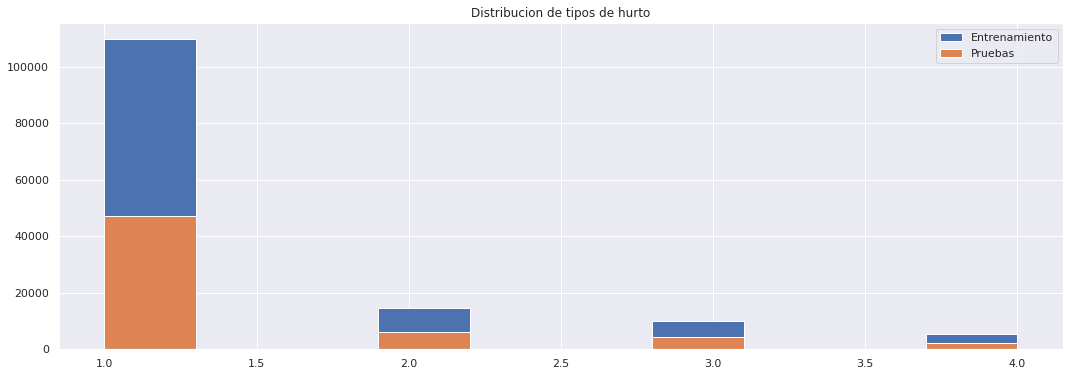

In [ ]:
pl.figure(figsize = (18,6))
pl.hist( y_train, label='Entrenamiento')
pl.hist(y_test, label='Pruebas')
pl.legend()
pl.title("Distribucion de tipos de hurto")
pl.show()

**Modelos**

**Gausiano Naive Bayes**

In [ ]:
clasificador_Gauss = GaussianNB()
clasificador_Gauss.fit(X_train, y_train);
print('SCORE entrenamiento: {}'.format(clasificador_Gauss.score(X_train, y_train)))
print('Error en entrenamiento: {}'.format(1-clasificador_Gauss.score(X_train, y_train)))
print('SCORE prueba: {}'.format(clasificador_Gauss.score(X_test, y_test)))
print('Error en prueba: {}'.format(1-clasificador_Gauss.score(X_test, y_test)))

SCORE entrenamiento: 0.8645880941499086
Error en entrenamiento: 0.13541190585009144
SCORE prueba: 0.8635507789719237
Error en prueba: 0.13644922102807633


**Multinomial**

In [ ]:
#Leer el modelo en la documentación
#Evaluar hiperparametros para mejoraro empeorar el modelo, ejemplo multi class= "ovr" solver= liblinear
clasificador_multinomial = LogisticRegression(multi_class='ovr', solver='liblinear')
clasificador_multinomial.fit(X_train, y_train);
print('SCORE entrenamiento: {}'.format(clasificador_multinomial.score(X_train, y_train)))
print('Error en entrenamiento: {}'.format(1-clasificador_multinomial.score(X_train, y_train)))
print('SCORE prueba: {}'.format(clasificador_multinomial.score(X_test, y_test)))
print('Error en prueba:{}'.format(1-clasificador_multinomial.score(X_test, y_test)))

SCORE entrenamiento: 0.8768781421389397
Error en entrenamiento: 0.12312185786106034
SCORE prueba: 0.8769974173123386
Error en prueba:0.1230025826876614


---

**Entrenando un Randomforest**

In [ ]:
clf = RandomForestClassifier(n_estimators=32, max_features=5)
clf.fit(X_train,y_train);

In [ ]:
print('Error en entrenamiento: {}'.format(1-clf.score(X_train, y_train)))
print('Error en prueba: {}'.format(1-clf.score(X_test, y_test)))
print('Score en entrenamiento:{}'.format(clf.score(X_train, y_train)))
print('Score en prueba: {}'.format(clf.score(X_test, y_test)))

Error en entrenamiento: 0.1068470063985375
Error en prueba: 0.10743980671498787
Score en entrenamiento:0.8931529936014625
Score en prueba: 0.8925601932850121


---

**Generando un grafico Lineal con los datos de entrenamiento**

---

In [ ]:
print(X_train.shape)
print(y_train.shape)

(140032, 6)
(140032,)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

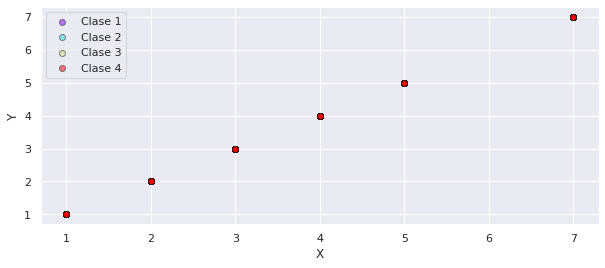

In [ ]:
pl.figure(figsize=(10, 4))
pl.xlabel('X')
pl.ylabel('Y')
plot_data(X_train, y_train)

In [ ]:
print(X_train[3])

[ 7  7 -1  1  1  1]


In [ ]:
y

array([1, 1, 1, ..., 3, 3, 3])

---

**Exportar el Set de datos en archivo (.CSV)**

In [ ]:
# Grabar el dataframe como archivo separado por comas
df2.to_csv('/content/drive/MyDrive/Mineria de Datos/Data Set - Policia - Proyecto/Data2.csv',index=False)

---

#### 1 Seleccionando columnas para el análisis

Para este caso se van a seleccionar únicamente las variables que son relevantes para el análisis:

*  DEPARTAMENTO     
*  MUNICIPIO          
*  ARMAS MEDIOS     
*  FECHA HECHO      
*  GENERO           
*  GRUPO ETARIO     
*  TIPO DE HURTO
*  CANTIDAD DE HURTO

   

In [ ]:
df2_selected_data = df2[['departamento',
                         'municipio',
                         'armas_medios',
                         'fecha_hecho',
                         'genero',
                         'grupo_etario',
                         'tipo_de_hurto',
                         'cantidad_de_hurtos']].copy()

---

In [ ]:
df2_selected_data.value_counts()

departamento  municipio         armas_medios         fecha_hecho  genero     grupo_etario  tipo_de_hurto       cantidad_de_hurtos
CUNDINAMARCA  BOGOTÁ D.C. (CT)  SIN EMPLEO DE ARMAS  2020-07-01   FEMENINO   ADULTOS       HURTO PERSONAS      1                     232
                                                     2020-09-01   FEMENINO   ADULTOS       HURTO PERSONAS      1                     200
                                                     2020-08-01   FEMENINO   ADULTOS       HURTO PERSONAS      1                     196
                                                     2020-07-01   MASCULINO  ADULTOS       HURTO PERSONAS      1                     196
                                                     2020-08-01   MASCULINO  ADULTOS       HURTO PERSONAS      1                     193
                                                                                                                                    ... 
NARIÑO        PASTO (CT)        LLAVE MAESTRA   

---

**Analisis de los datos**

**Se plantean las siguientes preguntas para iniciar con el analisis de los datos:**


1. ¿Cuantos hurtos a personas con arma de fuego ocurrieron en el departamento de cundinamarca por año?

In [ ]:
df_result=df2[df2.tipo_de_hurto.isin(["HURTO PERSONAS"]) & df2.armas_medios.isin(["ARMA DE FUEGO"]) & df2.departamento.isin(['CUNDINAMARCA']) & df2.cantidad_de_hurtos].copy()
df_result.groupby(by=[df_result1.fecha_hecho.dt.year]).count()['cantidad_de_hurtos']

fecha_hecho
2010      438
2011      441
2012      397
2013      411
2014      416
2015      433
2016        4
2017     1248
2018     1318
2019     1185
2020    11494
2021     3688
Name: cantidad_de_hurtos, dtype: int64

2. ¿cuantos hurtos se cometieron con arma blanca?

In [ ]:
df2.armas_medios.str.contains('BLANCA').count()

1638571

3. ¿En que municipio y departamento se cometieron mas hurtos con arma de fuego?

In [ ]:
df2.groupby(['municipio', 'departamento', 'armas_medios']).max(['cantidad_de_hurtos'])

cantidad_de_hurtos
municipio     departamento armas_medios                           
ABEJORRAL     ANTIOQUIA    ARMA BLANCA                           1
                           ARMA DE FUEGO                         2
                           CONTUNDENTES                          3
                           LLAVE MAESTRA                         1
                           NO REPORTA                            1
...                                                            ...
ZONA BANANERA MAGDALENA    SIN EMPLEO DE ARMAS                   3
ÚTICA         CUNDINAMARCA ARMA BLANCA                           1
                           ARMA DE FUEGO                         1
                           CONTUNDENTES                          1
                           SIN EMPLEO DE ARMAS                   1

[6516 rows x 1 columns]

4. ¿En Bogota cuantos hurtos a automotores se realizan?



In [ ]:
df2[df2.municipio.isin(["BOGOTÁ D.C. (CT)"]) & df2.tipo_de_hurto.isin(["HURTO AUTOMOTORES"])].max()['cantidad_de_hurtos']

34

5. ¿Cual es la media de hurtos realizados con arma de fuego en bogota?

In [ ]:
df_result.groupby('tipo_de_hurto').mean()['cantidad_de_hurtos']

tipo_de_hurto
HURTO PERSONAS    1.895357
Name: cantidad_de_hurtos, dtype: float64

**Tablas de frecuencia a partir de los datos**

In [ ]:
def generateFrequencyTable( data_df, variable, n_values):
    data_count_by_type_df = (data_df.groupby(variable)[variable]
                             .count()
                             .sort_values(ascending=False)
                             .reset_index(name='cantidad'))
    data_count_by_type_df['porcentaje'] = round(data_count_by_type_df['cantidad']/ n_values * 100, 2)
    return data_count_by_type_df

In [ ]:
df_selected_data = generateFrequencyTable(df2_selected_data, 'departamento', df2_selected_data.shape[0]).sort_values(by='porcentaje', ascending=False)
df_selected_data

,departamento,cantidad,porcentaje
0,CUNDINAMARCA,317874,19.40
1,ANTIOQUIA,202753,12.37
2,VALLE,172485,10.53
3,SANTANDER,97424,5.95
4,ATLÁNTICO,82484,5.03
5,TOLIMA,64847,3.96
6,META,58822,3.59
7,HUILA,53785,3.28
8,CAUCA,52397,3.20
9,BOLÍVAR,49394,3.01


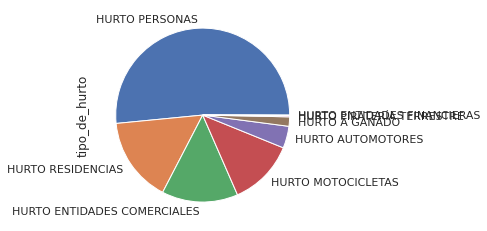

In [ ]:
df2_selected_data['tipo_de_hurto'].value_counts().plot.pie();

In [ ]:
# función tomada de internet.
def drawPlot( data, variable, title, label ):  
    ax = data[variable].value_counts().plot(kind='barh', figsize=(10,7),
                                        color="green", fontsize=13);
    ax.set_alpha(0.8)
    ax.set_title(title, fontsize=15)
    ax.set_xlabel(label, fontsize=15);
    #ax.set_xticks([0.0, 25.0, 50.0, 75.0, 100.0])
    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(i.get_width()+.3, i.get_y()+.38, \
                str(round((i.get_width()/total)*100, 2))+'%', fontsize=12,
    color='black')

    # invert for largest on top 
    ax.invert_yaxis()

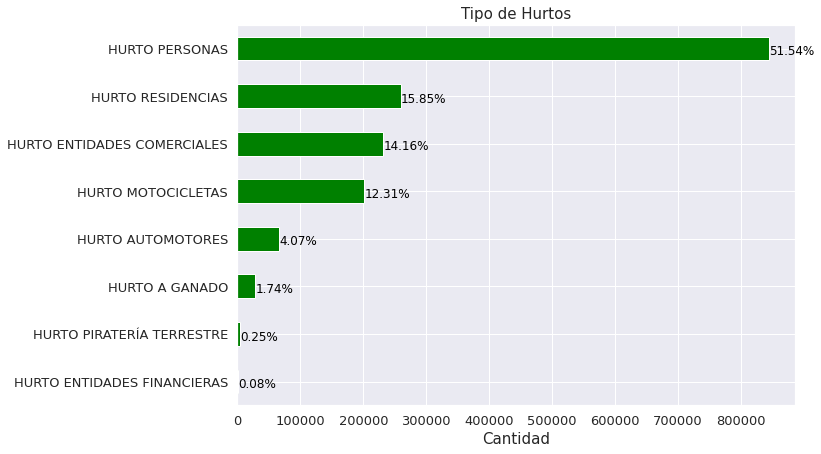

In [ ]:
# Histograma por tipo de hurto:
drawPlot(df2_selected_data, 'tipo_de_hurto', "Tipo de Hurtos", "Cantidad")

---

###**AZURE COSMOS DB y POWER BI**

**Importar conexión a base de datos Cosmos DB en Azure**


In [ ]:
from pymongo import MongoClient

In [ ]:
uri = "mongodb://diegosanch:5wBt41LP6traK1JaaSqcsVoSHMkWpKDir3zIVDCu3B85ZveL5v5JIUXUaVXDKv6vur5pGuHzwX27gL4AAjO7Qg==@diegosanch.mongo.cosmos.azure.com:10255/?ssl=true&retrywrites=false&replicaSet=globaldb&maxIdleTimeMS=120000&appName=@diegosanch@"
client = MongoClient(uri)

In [ ]:
db=client.db_hurto_cosmos_db 

In [ ]:
c=db.tipos_de_hurto

**Importando datos a Azure Cosmos DB**

Imagen 1 consulta de documentos.

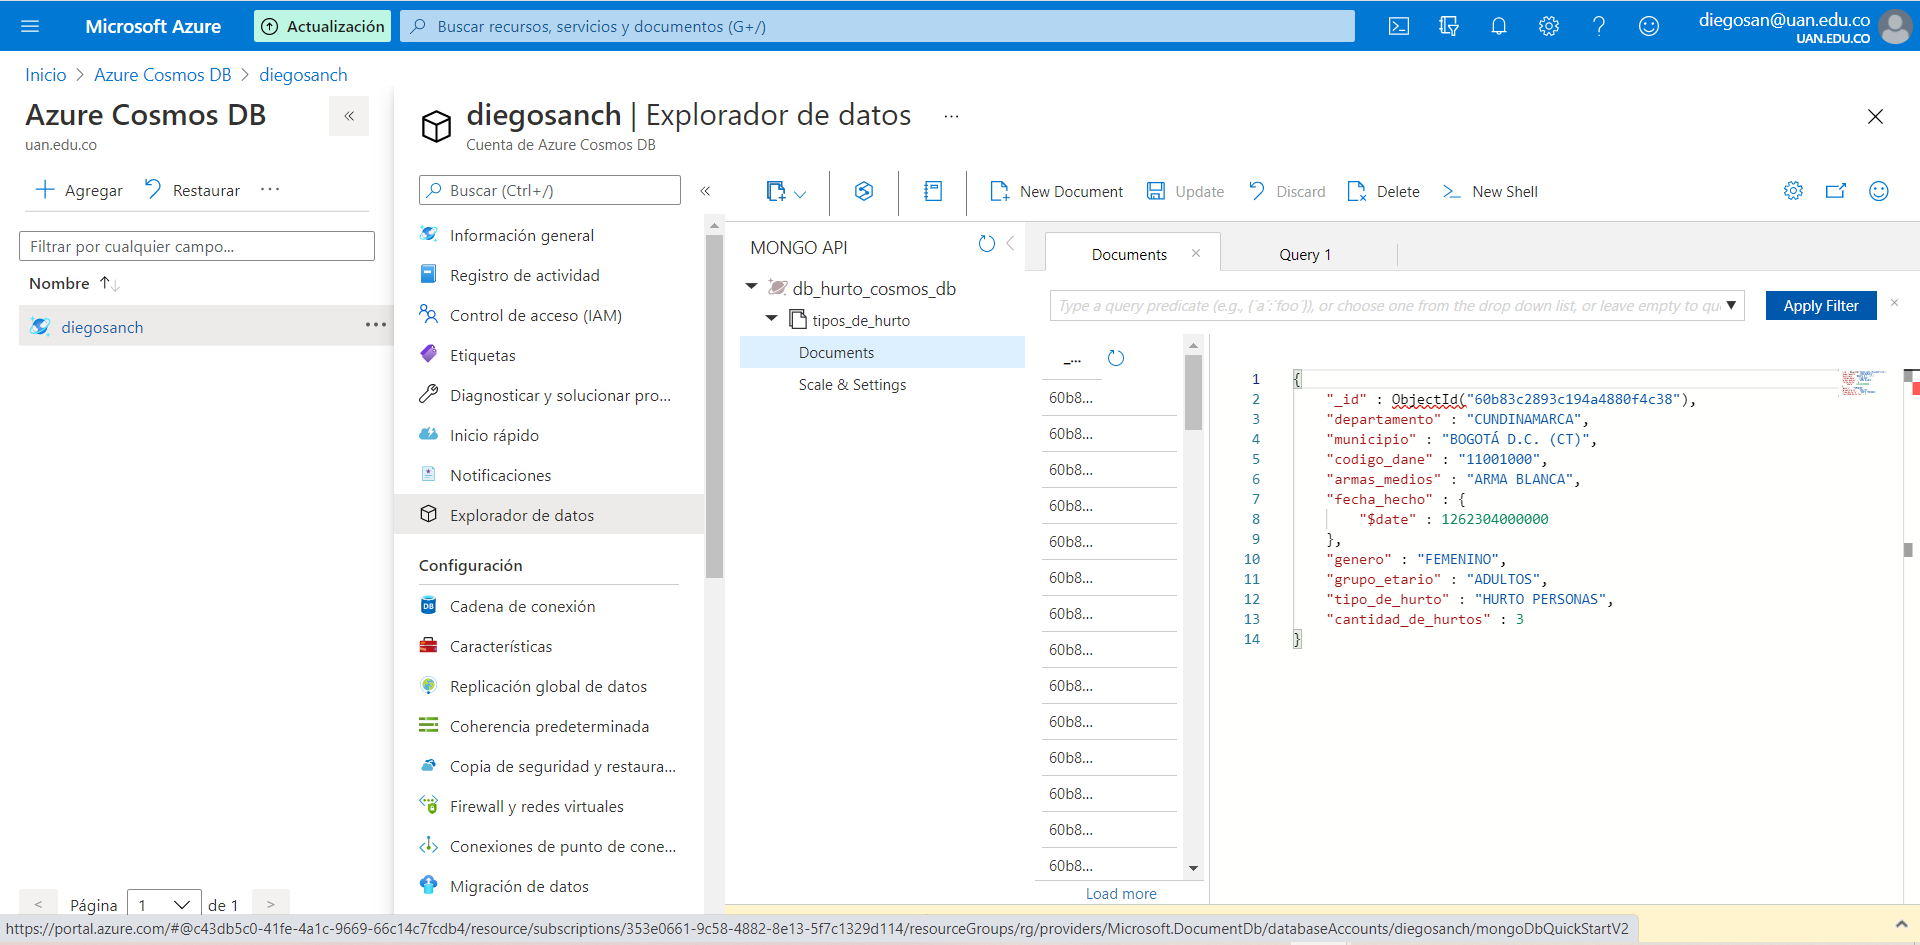

Cadena de conexion

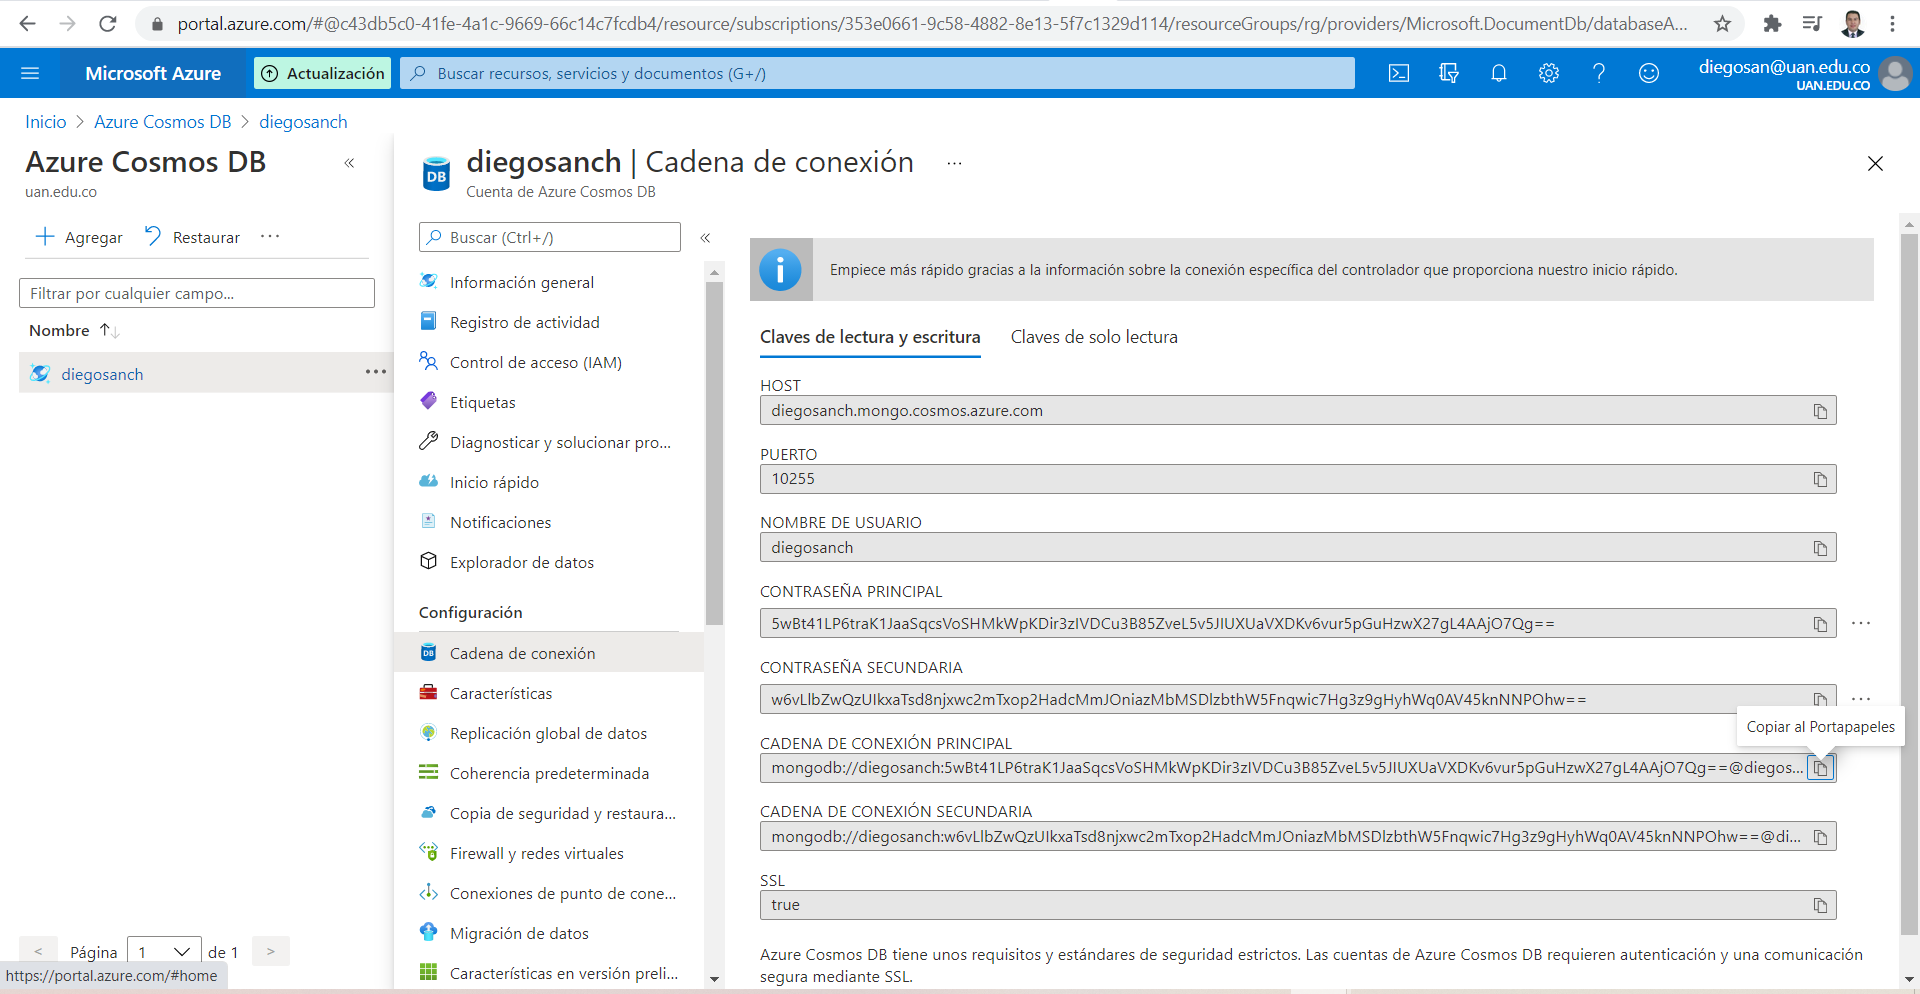

Origen de datos en Power Bi

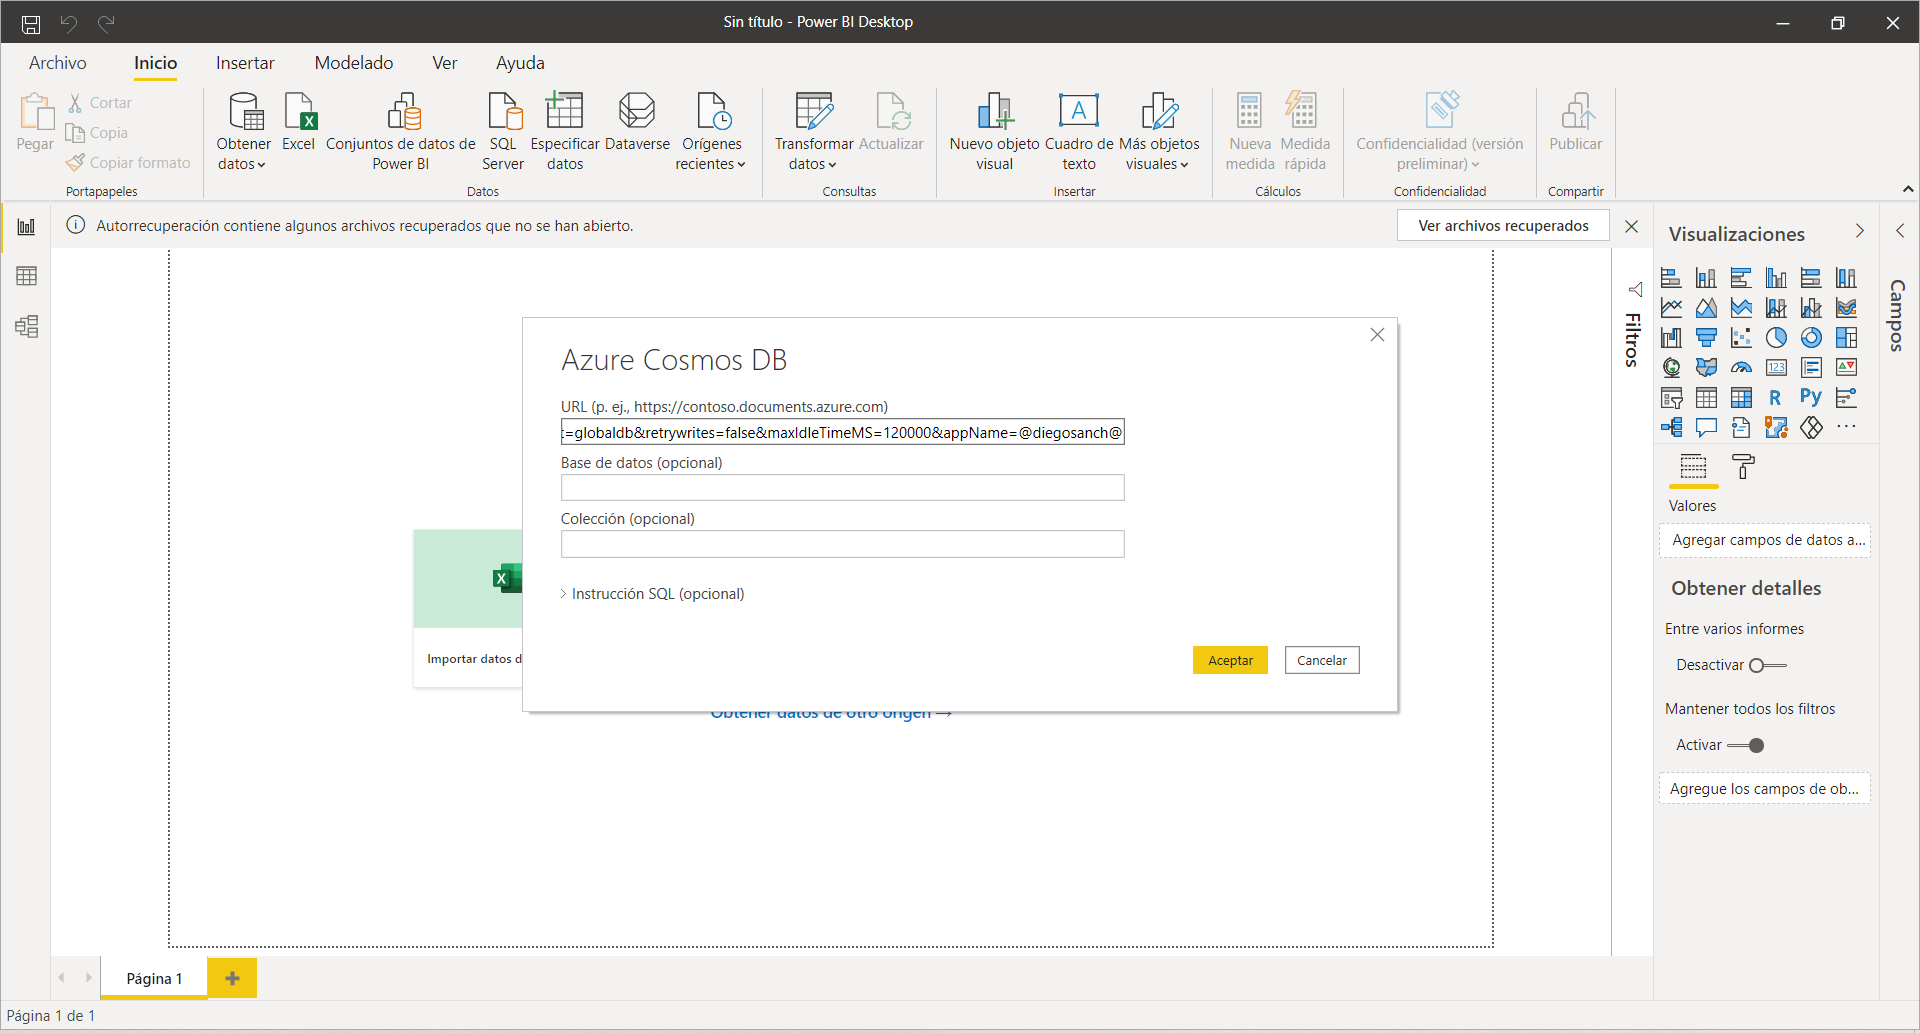

Generación de graficos  en power BI

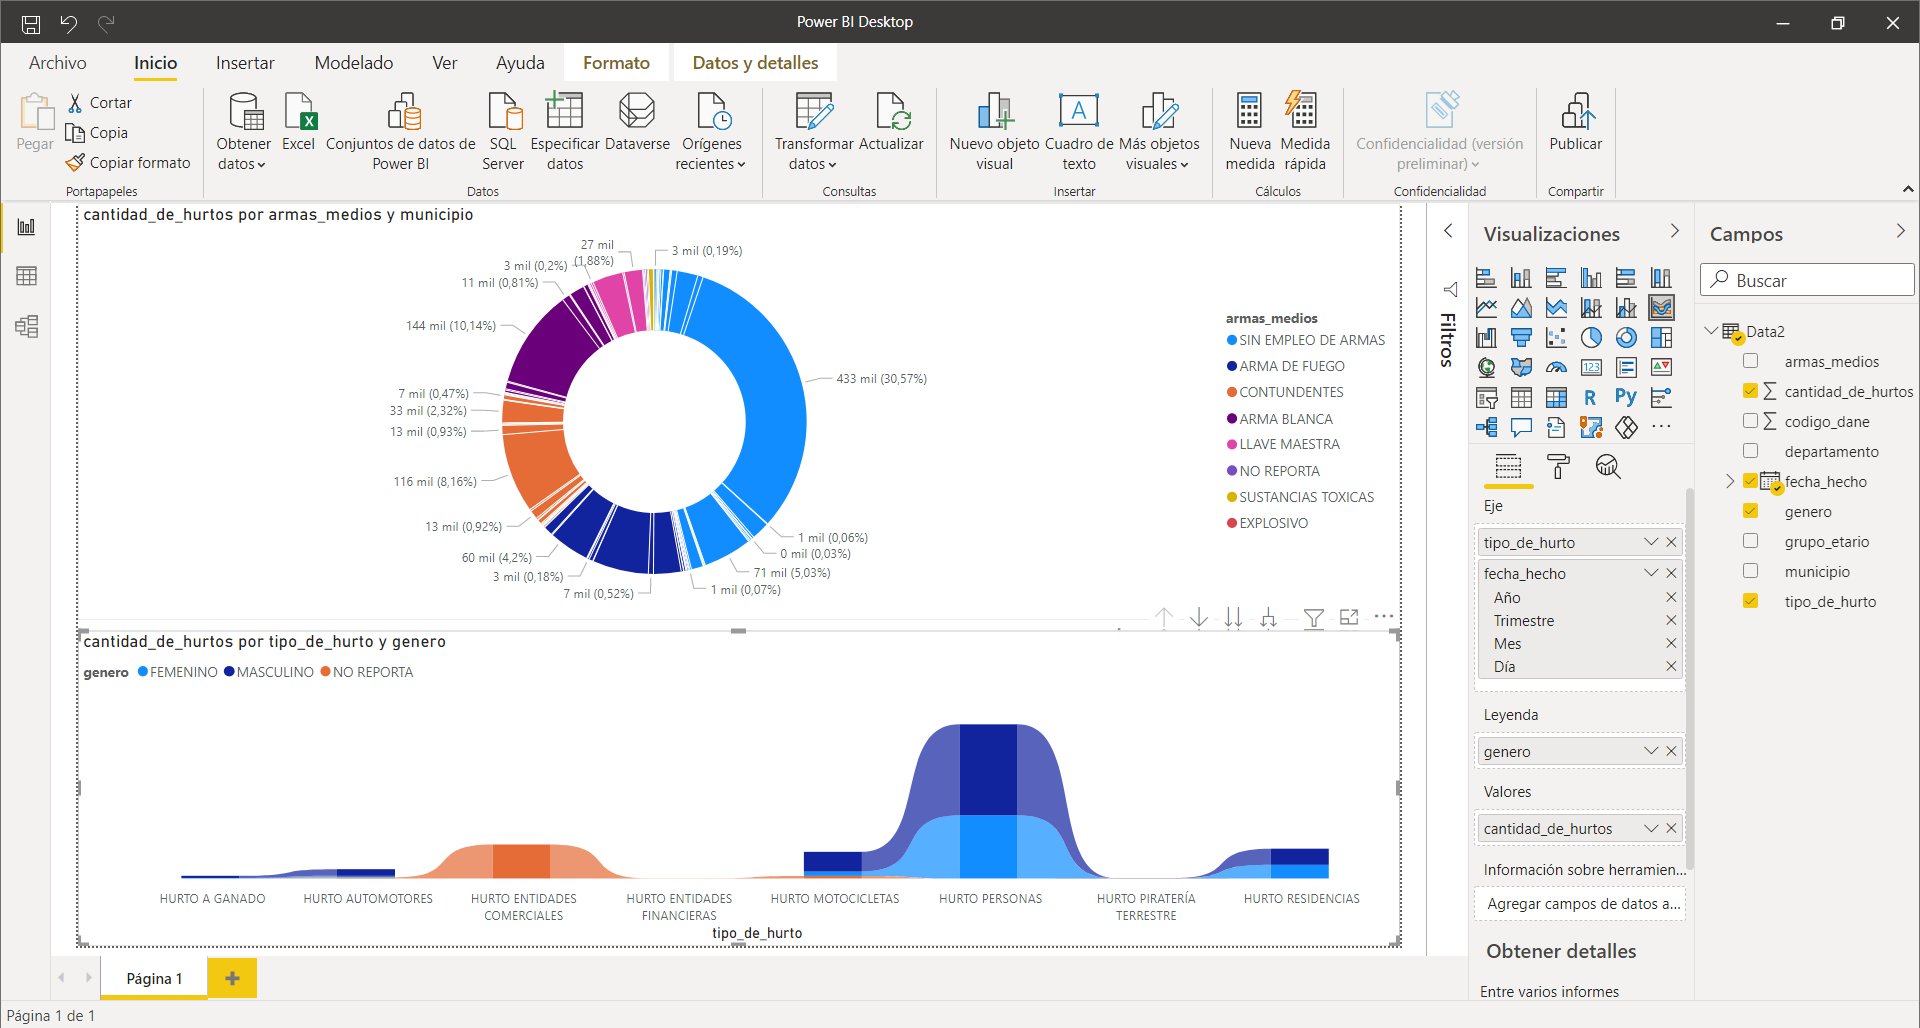

### **Conclusiones:**

En cuanto al analisís realizado a los datos recopilados se puede concluir que la modalidad de hurto mas presentada en colombia es el hurto a personas sin armas o medios y se presenta con un grande crecimiento en el departamento de cundinamarca en el municipio de Bogota.

Dentro de las modalidades de hurtos más denunciados se encuentran las modalidades de hurto a residencias, hurto a comercios y hurto a motocicletas.

Se observa que los victimarios mas denunciados son del genero másculino y se encuentran en el grupo etario indentificado como adultos.

Este proyecto tiene como objetivo aplicar los conocimientos adquiridos en las asignaturas de **Arquitectura de datos**, **Mineria de datos** y **Bases de datos** **NoSQL** durante el primer semestre, los resultados obtenidos son con fines **educativos** y de analisis y predicción de los datos y la obtención de estimaciones sobre la percepción de seguridad en Colombia en sus departamentos y municipios en relación con los **tipos de hurto por modalidad** que se presentan actualmente en el país. 

### **Links de interes:**

https://www.policia.gov.co/grupo-informacion-criminalidad/estadistica-delictiva

https://repository.eafit.edu.co/handle/10784/14693

https://portal.azure.com/#@c43db5c0-41fe-4a1c-9669-66c14c7fcdb4/resource/subscriptions/353e0661-9c58-4882-8e13-5f7c1329d114/resourceGroups/rg/providers/Microsoft.DocumentDb/databaseAccounts/diegosanch/overview

https://biblioteca.utb.edu.co/notas/tesis/0074619.pdf

http://www.sdp.gov.co/sites/default/files/anexo_4_diagnosticos_territoriales.pdf

https://repository.udistrital.edu.co/bitstream/handle/11349/6519/Pe%C3%B1aSuarezAlfonso2017.pdf?sequence=1&isAllowed=y

https://revistas.uptc.edu.co/index.php/ingenieria/article/view/11740/9603

https://doc-0c-5g-apps-viewer.googleusercontent.com/viewer/secure/pdf/6053ssmfvem2vdlsuc1v8dfrkq0tqorf/qisqij1jimfnc66ted2a22du2i9721b8/1622184000000/lantern/11417588684182538866/ACFrOgBzSj-AmP-MwQWsOgF0oQxfKJJ28_K2SkewDp5hjSTDgVzIBXhutiLdNJFi7v8LDQ8AhgiJxH16oKhsFpY-9wWKdff-CZcOePum8G6s72PlMXn018DlgGS7ZnAEOUOtoSeudiTvk0-if5o4?print=true&nonce=1vb2sr9s0tn80&user=11417588684182538866&hash=jf9tajs13dvnaul6rf2jtmid8teb8u11


---

###**Links de aprendizaje de python:**

https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/

https://joserzapata.github.io/courses/python-ciencia-datos/pandas/#leer-y-guardar-datos-data-input-and-output

https://github.com/jbagnato/machine-learning/blob/master/Ejercicio_Arbol_de_Decision.ipynb

https://www.aprendemachinelearning.com/arbol-de-decision-en-python-clasificacion-y-prediccion/

---